In [13]:
import json, os, re
from google.colab import files

# 1) Put your CURRENT notebook filename here (exactly as shown in Colab title bar)
NOTEBOOK_NAME = "31st Jan_1st Feb_2026.ipynb"

# 2) If the notebook file isn't in /content yet, download it from Colab UI and upload it here.
#    (Files -> Upload, or run files.upload() below)
if not os.path.exists(NOTEBOOK_NAME):
    print(f"'{NOTEBOOK_NAME}' not found in /content. Please upload it now...")
    uploaded = files.upload()  # choose the .ipynb from your computer
    # If user uploaded a file with a different name, pick the first uploaded
    if uploaded:
        NOTEBOOK_NAME = next(iter(uploaded.keys()))
        print("Using uploaded file:", NOTEBOOK_NAME)

out_name = re.sub(r"\.ipynb$", "", NOTEBOOK_NAME) + "_clean.ipynb"

# 3) Load notebook JSON
with open(NOTEBOOK_NAME, "r", encoding="utf-8") as f:
    nb = json.load(f)

# 4) Remove problematic widget metadata (fixes GitHub "Invalid Notebook")
md = nb.get("metadata", {})
if "widgets" in md:
    md.pop("widgets", None)
nb["metadata"] = md

# (Optional but helpful) remove per-cell widget outputs' metadata (safe)
for cell in nb.get("cells", []):
    # remove cell-level metadata.widgets if present
    c_md = cell.get("metadata", {})
    if "widgets" in c_md:
        c_md.pop("widgets", None)
    cell["metadata"] = c_md

# 5) Save cleaned notebook
with open(out_name, "w", encoding="utf-8") as f:
    json.dump(nb, f, ensure_ascii=False, indent=1)

print("✅ Saved cleaned notebook:", out_name)

# 6) Download cleaned notebook to your computer
files.download(out_name)


ModuleNotFoundError: No module named 'google.colab'

In [1]:
import sys
print(sys.executable)


/root/AI/.venv/bin/python


In [2]:
import sys
!{sys.executable} -m pip install -q langchain langchain-openai langchain-core python-dotenv

In [3]:
import os
print("CWD:", os.getcwd())
print("Has .env here?", os.path.exists(".env"))
print("Files here:", os.listdir())


CWD: /root/AI/notebooks
Has .env here? False
Files here: ['31st_Jan_1st_Feb_2026_clean.ipynb']


In [5]:
import dotenv
import os

dotenv.load_dotenv("../.env")

print("API KEY FOUND:", os.getenv("OPENROUTER_API_KEY"))
print("BASE URL:", os.getenv("OPENROUTER_BASE_URL"))


API KEY FOUND: 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
BASE URL: https://openrouter.ai/api/v1


In [6]:
# ============================================================
# CELL 1: Environment sanity check (Python basics)
# ============================================================

# import = "bring a module (library) into my code"
# sys = module that gives info about Python runtime
import sys

# os = module for operating system stuff (paths, folders, env vars)
import os

print("✅ Python executable used by this notebook:")
print(sys.executable)   # where Python is running from

print("\n✅ Python version:")
print(sys.version)

print("\n✅ Current working directory (CWD):")
print(os.getcwd())      # tells which folder the notebook is 'standing in'


✅ Python executable used by this notebook:
/root/AI/.venv/bin/python

✅ Python version:
3.11.14 (main, Dec  1 2025, 10:09:11) [GCC 9.4.0]

✅ Current working directory (CWD):
/root/AI/notebooks


In [7]:
# ============================================================
# CELL 2: Load environment variables from .env (Beginner friendly)
# ============================================================

# dotenv is not built into Python; it's a package you installed.
import dotenv

# 🔎 Let's check if .env exists in the CURRENT folder
print("CWD:", os.getcwd())
print("Does '.env' exist in CWD?", os.path.exists(".env"))

# Your .env is in the PROJECT ROOT, not inside notebooks/.
# So we go ONE folder UP using ".."
env_path = os.path.join("..", ".env")

print("\nExpected .env path:", os.path.abspath(env_path))
print("Does '.env' exist there?", os.path.exists(env_path))

# Load the .env file into environment variables
dotenv.load_dotenv(env_path)

# Now read variables (they become available in os.getenv)
api_key = os.getenv("OPENROUTER_API_KEY")
base_url = os.getenv("OPENROUTER_BASE_URL")

print("\nLoaded API key? ", "YES" if api_key else "NO")
print("Loaded Base URL? ", base_url)


CWD: /root/AI/notebooks
Does '.env' exist in CWD? False

Expected .env path: /root/AI/.env
Does '.env' exist there? True

Loaded API key?  YES
Loaded Base URL?  https://openrouter.ai/api/v1


In [8]:
# ============================================================
# CELL 3: Load knowledge text file into Python (File handling basics)
# ============================================================

from pathlib import Path  # pathlib is a clean way to work with paths

# The notebook is inside notebooks/, so project root is ".."
project_root = Path("..")

# The kb text file is inside src/
kb_path = project_root / "src" / "kb_modiji.txt"

print("Knowledge file absolute path:")
print(kb_path.resolve())

print("\nDoes the file exist?", kb_path.exists())

# Read the file into a Python string variable called "text"
# A "string" is just text in Python.
text = kb_path.read_text(encoding="utf-8", errors="ignore")

print("\nTotal characters loaded:", len(text))
print("\nPreview (first 400 chars):\n")
print(text[:400])


Knowledge file absolute path:
/root/AI/src/kb_modiji.txt

Does the file exist? True

Total characters loaded: 6754

Preview (first 400 chars):

# HISTORY OF NARENDRA MODI

## Early Life and Background

**Birth and Family:**
- Born: September 17, 1950, in Vadnagar, Gujarat, India
- Parents: Damodardas Mulchand Modi (father) and Hiraben Modi (mother)
- Family Background: Born into a lower-middle-class family of the Ghanchi-Teli (oil-presser) community
- Siblings: Third of six children

**Childhood:**
- Helped his father run a tea stall at t


In [ ]:
# Additional datasets for AIGF Cohort 3

In [35]:
import sys

!{sys.executable} -m pip install -q langchain-text-splitters


In [37]:
# ============================================================
# CELL 4: Chunk the text into smaller pieces (RAG + Python lists)
# ============================================================

from langchain_text_splitters import RecursiveCharacterTextSplitter

# chunk_size: max characters per chunk
# chunk_overlap: repeated chars between chunks (prevents broken context)
splitter = RecursiveCharacterTextSplitter(chunk_size=800, chunk_overlap=100)

# docs becomes a Python LIST of Document objects
docs = splitter.create_documents([text])

print("Total chunks created:", len(docs))

# docs[0] means: first element of list (Python indexing starts at 0)
first_chunk = docs[0].page_content

print("\nFirst chunk preview:\n")
print(first_chunk[:400])


Total chunks created: 11

First chunk preview:

# HISTORY OF NARENDRA MODI

## Early Life and Background

**Birth and Family:**
- Born: September 17, 1950, in Vadnagar, Gujarat, India
- Parents: Damodardas Mulchand Modi (father) and Hiraben Modi (mother)
- Family Background: Born into a lower-middle-class family of the Ghanchi-Teli (oil-presser) community
- Siblings: Third of six children

**Childhood:**
- Helped his father run a tea stall at t


In [ ]:
import sys
!{sys.executable} -m pip install -q langchain-community chromadb


In [7]:

import sqlite3
print("sqlite3 version:", sqlite3.sqlite_version)



sqlite3 version: 3.31.1


In [14]:
import sys
!{sys.executable} -m pip install -U -q chromadb langchain-community pysqlite3-binary


In [9]:
import sys
import pysqlite3

# Force Python to use the newer SQLite shipped by pysqlite3-binary
sys.modules["sqlite3"] = pysqlite3

import sqlite3
print("SQLite now:", sqlite3.sqlite_version)  # should be >= 3.35


SQLite now: 3.51.1


In [10]:
# ============================================================
# CELL 7: Embeddings + Vector Store (RAG core)
# ============================================================

import os
import dotenv

# 1) Load .env from project root (since notebook is in /notebooks)
dotenv.load_dotenv("../.env")

OPENROUTER_API_KEY = os.getenv("OPENROUTER_API_KEY")
OPENROUTER_BASE_URL = os.getenv("OPENROUTER_BASE_URL")

print("Key loaded?", "YES" if OPENROUTER_API_KEY else "NO")
print("Base URL:", OPENROUTER_BASE_URL)

# 2) Embeddings model (this turns text -> numbers/vectors)
from langchain_openai import OpenAIEmbeddings

embeddings = OpenAIEmbeddings(
    openai_api_key=OPENROUTER_API_KEY,
    openai_api_base=OPENROUTER_BASE_URL,
    model="text-embedding-3-small"  # good default
)

# 3) Vector database (Chroma)
from langchain_community.vectorstores import Chroma

# persist_directory = saves index to disk so you don’t rebuild every time
vectordb = Chroma.from_documents(
    documents=docs,                 # your chunks from Cell 4
    embedding=embeddings,
    persist_directory="../chroma_db"
)

print("✅ Vector DB built with chunks:", vectordb._collection.count())


Key loaded? YES
Base URL: https://openrouter.ai/api/v1


/root/AI/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


NameError: name 'docs' is not defined

In [ ]:
import sys
!{sys.executable} -m pip install -U langchain langchain-community



In [ ]:
import sys, importlib, pkgutil

print("Python:", sys.executable)

import langchain
print("langchain module path:", getattr(langchain, "__file__", "NO __file__ (namespace?)"))
print("langchain version:", getattr(langchain, "__version__", "NO __version__"))

# Show what submodules exist under langchain
if hasattr(langchain, "__path__"):
    subs = sorted([m.name for m in pkgutil.iter_modules(langchain.__path__)])
    print("langchain submodules:", subs[:50], "..." if len(subs) > 50 else "")
else:
    print("langchain has no __path__")


Python: /root/AI/.venv/bin/python
langchain module path: /root/AI/.venv/lib/python3.11/site-packages/langchain/__init__.py
langchain version: 1.2.8
langchain submodules: ['agents', 'chat_models', 'embeddings', 'messages', 'rate_limiters', 'tools'] 


In [ ]:
import sys
!{sys.executable} -m pip show langchain langchain-core langchain-community langchain-openai


Name: langchain
Version: 1.2.8
Summary: Building applications with LLMs through composability
Home-page: https://docs.langchain.com/
Author: 
Author-email: 
License: MIT
Location: /root/AI/.venv/lib/python3.11/site-packages
Requires: langchain-core, langgraph, pydantic
Required-by: 
---
Name: langchain-core
Version: 1.2.8
Summary: Building applications with LLMs through composability
Home-page: https://docs.langchain.com/
Author: 
Author-email: 
License: MIT
Location: /root/AI/.venv/lib/python3.11/site-packages
Requires: jsonpatch, langsmith, packaging, pydantic, pyyaml, tenacity, typing-extensions, uuid-utils
Required-by: langchain, langchain-classic, langchain-community, langchain-openai, langchain-text-splitters, langgraph, langgraph-checkpoint, langgraph-prebuilt
---
Name: langchain-community
Version: 0.4.1
Summary: Community contributed LangChain integrations.
Home-page: 
Author: 
Author-email: 
License: MIT
Location: /root/AI/.venv/lib/python3.11/site-packages
Requires: aiohttp, 

In [ ]:
from langchain_classic.chains import RetrievalQA


In [ ]:
import langchain_classic
print("langchain_classic:", langchain_classic.__file__)

from langchain_classic.chains import RetrievalQA
print("✅ RetrievalQA import works")


langchain_classic: /root/AI/.venv/lib/python3.11/site-packages/langchain_classic/__init__.py
✅ RetrievalQA import works


In [ ]:
print("vectordb exists?", "vectordb" in globals())
if "vectordb" in globals():
    print("type(vectordb):", type(vectordb))
    print("has as_retriever?", hasattr(vectordb, "as_retriever"))


vectordb exists? True
type(vectordb): <class 'langchain_community.vectorstores.chroma.Chroma'>
has as_retriever? True


In [ ]:
# ============================================================
# CELL 8: Retrieval + Q&A (RAG = Search + Answer)
# ============================================================

# ----------------------------
# What you already did in Cell 7
# ----------------------------
# You created:
#   ✅ embeddings (numbers representing meaning of text)
#   ✅ vectordb (Chroma) = a database that stores those embeddings
#
# Now in Cell 8 we will:
#   1) turn vectordb into a "retriever" (semantic search)
#   2) connect an LLM (Chat model)
#   3) ask a question
#   4) the retriever fetches relevant chunks
#   5) the LLM answers using those chunks
#
# This is the core idea of RAG:
# 🔥 Retrieval-Augmented Generation

import os

# Chat model (LLM)
from langchain_openai import ChatOpenAI

# A simple RAG pipeline helper
from langchain_classic.chains import RetrievalQA




# ----------------------------
# 1) Create a retriever from your vector DB
# ----------------------------
# A retriever is like:
# "Search engine over your chunks"
retriever = vectordb.as_retriever(search_kwargs={"k": 4})
# k=4 means: return the top 4 most relevant chunks


# ----------------------------
# 2) Create the LLM connection (Chat model)
# ----------------------------
# This uses your .env values
llm = ChatOpenAI(
    openai_api_key=os.getenv("OPENROUTER_API_KEY"),
    openai_api_base=os.getenv("OPENROUTER_BASE_URL"),
    model_name="gpt-4o-mini-2024-07-18",
    temperature=0.2  # lower = more factual, less creative
)


# ----------------------------
# 3) Build the RAG chain
# ----------------------------
# This pipeline does:
# question -> retrieve chunks -> send to LLM -> answer
qa = RetrievalQA.from_chain_type(
    llm=llm,
    chain_type="stuff",          # "stuff" = put retrieved chunks into prompt directly
    retriever=retriever,
    return_source_documents=True # also return which chunks were used
)


# ----------------------------
# 4) Ask a question
# ----------------------------
question = "Summarize this notebook in 5 bullet points."
result = qa.invoke({"query": question})

print("✅ ANSWER:\n")
print(result["result"])


# ----------------------------
# 5) (Optional) See which chunks were used
# ----------------------------
print("\n\n📌 SOURCES USED (top chunks):\n")
for i, doc in enumerate(result["source_documents"], start=1):
    print(f"--- Source chunk {i} ---")
    print(doc.page_content[:500])  # show first 500 chars of chunk
    print()


✅ ANSWER:

- The notebook outlines key social welfare initiatives, including Beti Bachao Beti Padhao, PM-KISAN, Ayushman Bharat, housing schemes, and rural development programs.
- It highlights advancements in technology and innovation, such as digital payments, Aadhaar-based service delivery, the Smart Cities Mission, and space program developments.
- Environmental initiatives are discussed, focusing on the International Solar Alliance, climate change commitments, renewable energy targets, and electric vehicle promotion.
- Major political developments include the abrogation of Article 370, the Citizenship Amendment Act, COVID-19 pandemic management, and vaccine distribution efforts.
- The current leadership term (2024-Present) is noted, with the BJP forming a government with the NDA alliance after the 2024 general elections, emphasizing economic initiatives like the Production Linked Incentive Scheme and Atmanirbhar Bharat.


📌 SOURCES USED (top chunks):

--- Source chunk 1 ---
**Soci

In [8]:
import os, dotenv
dotenv.load_dotenv("../.env")

OPENROUTER_API_KEY = os.getenv("OPENROUTER_API_KEY")
OPENROUTER_BASE_URL = os.getenv("OPENROUTER_BASE_URL")

print("Key loaded?", "YES" if OPENROUTER_API_KEY else "NO")
print("Base URL:", OPENROUTER_BASE_URL)


Key loaded? YES
Base URL: https://openrouter.ai/api/v1


In [13]:
# ============================================================
# CELL 9: NEW Chunking Strategy — CharacterTextSplitter
# ============================================================

# ----------------------------
# What we are doing in this cell
# ----------------------------
# We will:
#   1) Create chunks using CharacterTextSplitter
#   2) Rebuild vectordb using these chunks
#
# This allows us to compare different chunking strategies later.


from langchain_text_splitters import CharacterTextSplitter
from langchain_community.vectorstores import Chroma



# ----------------------------
# 1) Define Character Splitter
# ----------------------------
text_splitter = CharacterTextSplitter(
    separator=" ",
    chunk_size=500,
    chunk_overlap=10
)

# NOTE:
# chunk_overlap must always be smaller than chunk_size


# ----------------------------
# 2) Create chunks from documents
# ----------------------------
docs_char = text_splitter.split_text(text)
print("✅ Character chunks created:", len(docs_char))


print("\n🔎 Preview first 3 chunks:\n")
for i, chunk in enumerate(docs_char[:3], start=1):
    print(f"--- Chunk {i} ---")
    print(f"Length: {len(chunk)} characters")
    print(chunk[:500])  # print first 500 chars of the chunk
    print()

✅ Character chunks created: 14

🔎 Preview first 3 chunks:

--- Chunk 1 ---
Length: 500 characters
# HISTORY OF NARENDRA MODI

## Early Life and Background

**Birth and Family:**
- Born: September 17, 1950, in Vadnagar, Gujarat, India
- Parents: Damodardas Mulchand Modi (father) and Hiraben Modi (mother)
- Family Background: Born into a lower-middle-class family of the Ghanchi-Teli (oil-presser) community
- Siblings: Third of six children

**Childhood:**
- Helped his father run a tea stall at the Vadnagar railway station
- Described as an average student who was more interested in theater and

--- Chunk 2 ---
Length: 497 characters
and debates
- Early interest in politics and public speaking

## Education

- Completed higher secondary education in Vadnagar
- Bachelor's degree in Political Science from Delhi University (1978) through distance learning
- Master's degree in Political Science from Gujarat University (1983)
- Known to have been influenced by nationalist literature and ideolo

In [11]:
print("KEY repr:", repr(OPENROUTER_API_KEY))
print("KEY length:", len(OPENROUTER_API_KEY))

print("KEY repr:", repr(OPENAI_API_KEY))
print("KEY length:", len(OPENAI_API_KEY))

KEY repr: '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'
KEY length: 73


NameError: name 'OPENAI_API_KEY' is not defined

In [ ]:
!pip install sentence-transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 11.8 MB/s  0:00:00eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 915.6/915.6 MB 58.0 MB/s  0:00:15m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 61.9 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 594.3/594.3 MB 40.1 MB/s  0:00:11m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 46.1 MB/s  0:00:00eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.0/88.0 MB 38.1 MB/s  0:00:02m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 954.8/954.8 kB 40.0 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 706.8/706.8 MB 51.9 MB/s  0:00:15m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.1/193.1 MB 61.8 MB/s  0:00:03m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 47.1 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.6/63.6 MB 62.3 MB/s  0:00:01m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 267.5/267.5 

In [11]:
"""
Manual patch script - Run this in your Jupyter notebook cell
This will fix the chromadb.config.Settings issue
"""

import os

# Step 1: Find the file location
import langchain_community.vectorstores.chroma as chroma_module
chroma_file = chroma_module.__file__
print(f"📝 File location: {chroma_file}")

# Step 2: Read the file
with open(chroma_file, 'r') as f:
    content = f.read()

# Step 3: Create backup
backup_file = chroma_file + ".backup"
if not os.path.exists(backup_file):
    with open(backup_file, 'w') as f:
        f.write(content)
    print(f"✅ Backup created: {backup_file}")
else:
    print(f"ℹ️  Backup already exists: {backup_file}")

# Step 4: Replace the problematic code
old_pattern = "chromadb.config.Settings(is_persistent=True)"
new_pattern = "chromadb.Settings(is_persistent=True)"

if old_pattern in content:
    content = content.replace(old_pattern, new_pattern)
    
    # Write back
    with open(chroma_file, 'w') as f:
        f.write(content)
    
    print(f"\n✅ SUCCESS! File patched:")
    print(f"   Replaced: {old_pattern}")
    print(f"        with: {new_pattern}")
    print("\n" + "="*70)
    print("⚠️  CRITICAL NEXT STEP:")
    print("   1. Go to Kernel menu → Restart Kernel")
    print("   2. Re-run your imports and code")
    print("="*70)
else:
    print(f"\n⚠️  Pattern not found in file")
    print(f"   Searching for: {old_pattern}")
    print("\n   The file may already be patched or have different code.")
    
    # Show what's around line 117
    lines = content.split('\n')
    print("\n   Lines around 115-120:")
    for i in range(114, min(121, len(lines))):
        print(f"   {i+1}: {lines[i]}")

📝 File location: /root/AI/.venv/lib/python3.11/site-packages/langchain_community/vectorstores/chroma.py
ℹ️  Backup already exists: /root/AI/.venv/lib/python3.11/site-packages/langchain_community/vectorstores/chroma.py.backup

✅ SUCCESS! File patched:
   Replaced: chromadb.config.Settings(is_persistent=True)
        with: chromadb.Settings(is_persistent=True)

⚠️  CRITICAL NEXT STEP:
   1. Go to Kernel menu → Restart Kernel
   2. Re-run your imports and code


In [12]:
import os
import langchain_community.vectorstores.chroma as chroma_module

chroma_file = chroma_module.__file__
backup_file = chroma_file + ".backup"

print(f"📝 Original file: {chroma_file}")
print(f"📝 Backup file: {backup_file}")

if os.path.exists(backup_file):
    # Read backup
    with open(backup_file, 'r') as f:
        original_content = f.read()
    
    # Restore original
    with open(chroma_file, 'w') as f:
        f.write(original_content)
    
    print("\n✅ SUCCESS! Original file restored from backup")
else:
    print(f"\n❌ Backup file not found at: {backup_file}")

📝 Original file: /root/AI/.venv/lib/python3.11/site-packages/langchain_community/vectorstores/chroma.py
📝 Backup file: /root/AI/.venv/lib/python3.11/site-packages/langchain_community/vectorstores/chroma.py.backup

✅ SUCCESS! Original file restored from backup


In [18]:
import chromadb, inspect
print("chromadb file:", chromadb.__file__)
print("chromadb version:", getattr(chromadb, "__version__", "NO __version__"))
print("has chromadb.config ?", hasattr(chromadb, "config"))
print("dir contains Settings?", "Settings" in dir(chromadb))


chromadb file: /root/AI/.venv/lib/python3.11/site-packages/chromadb/__init__.py
chromadb version: 1.4.1
has chromadb.config ? False
dir contains Settings? True


In [19]:
pip install -U langchain-chroma


Note: you may need to restart the kernel to use updated packages.


In [20]:
from langchain_community.vectorstores import Chroma


In [14]:
# ============================================================
# CELL 7 (LOCAL): Embeddings + Vector Store (no OpenRouter needed)
# ============================================================

from langchain_community.embeddings import HuggingFaceEmbeddings
from langchain_community.vectorstores import Chroma

# Local embedding model (no key needed)
embeddings = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")

# sanity test
vec = embeddings.embed_query("test")
print("✅ Local embedding OK. Vector length:", len(vec))


from langchain_core.documents import Document

# Convert your plain text chunks to Document objects
docs_char_as_documents = [Document(page_content=text) for text in docs_char]

# Now use from_documents (which works!)
vectordb_char = Chroma.from_documents(
    documents=docs_char_as_documents,
    embedding=embeddings,
    persist_directory="../chroma_db_char"
)

print(f"✅ Vector DB built with {vectordb_char._collection.count()} chunks")



print("✅ Vector DB built with chunks:", vectordb_char._collection.count())


Loading weights: 100%|██████████| 103/103 [00:00<00:00, 331.13it/s, Materializing param=pooler.dense.weight]                             
BertModel LOAD REPORT from: sentence-transformers/all-MiniLM-L6-v2
Key                     | Status     |  | 
------------------------+------------+--+-
embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


✅ Local embedding OK. Vector length: 384
✅ Vector DB built with 28 chunks
✅ Vector DB built with chunks: 28


In [14]:
from .autonotebook import tqdm as notebook_tqdm

ImportError: attempted relative import with no known parent package

In [19]:

pip install --upgrade langchain langchain-community langchain-chroma chromadb

Note: you may need to restart the kernel to use updated packages.


In [25]:
pip install --upgrade --force-reinstall langchain-community langchain-chroma

  Using cached langchain_community-0.4.1-py3-none-any.whl.metadata (3.0 kB)
  Using cached langchain_chroma-1.1.0-py3-none-any.whl.metadata (1.9 kB)
  Using cached langchain_core-1.2.8-py3-none-any.whl.metadata (3.7 kB)
  Using cached langchain_classic-1.0.1-py3-none-any.whl.metadata (4.2 kB)
  Using cached sqlalchemy-2.0.46-cp311-cp311-manylinux2014_x86_64.manylinux_2_17_x86_64.manylinux_2_28_x86_64.whl.metadata (9.5 kB)
  Using cached requests-2.32.5-py3-none-any.whl.metadata (4.9 kB)
  Using cached pyyaml-6.0.3-cp311-cp311-manylinux2014_x86_64.manylinux_2_17_x86_64.manylinux_2_28_x86_64.whl.metadata (2.4 kB)
  Using cached aiohttp-3.13.3-cp311-cp311-manylinux2014_x86_64.manylinux_2_17_x86_64.manylinux_2_28_x86_64.whl.metadata (8.1 kB)
  Using cached tenacity-9.1.2-py3-none-any.whl.metadata (1.2 kB)
  Using cached dataclasses_json-0.6.7-py3-none-any.whl.metadata (25 kB)
  Using cached pydantic_settings-2.12.0-py3-none-any.whl.metadata (3.4 kB)
  Using cached langsmith-0.6.8-py3-none-

In [20]:
pip install -U langchain-chroma

Note: you may need to restart the kernel to use updated packages.


In [21]:
from langchain_chroma import Chroma


In [15]:
# Using Open AI

import os
import dotenv

dotenv.load_dotenv("../.env")

OPENAI_API_KEY = os.getenv("OPENAI_API_KEY")
print("OpenAI key loaded?", "YES" if OPENAI_API_KEY else "NO")

from langchain_openai import OpenAIEmbeddings

embeddings_openai = OpenAIEmbeddings(
    api_key=OPENAI_API_KEY,
    model="text-embedding-3-small"
)

# sanity test (must pass)
vec = embeddings_openai.embed_query("test")
print("✅ OpenAI embedding test length:", len(vec))

from langchain_community.vectorstores import Chroma

vectordb_char_openai = Chroma.from_texts(
    texts=docs_char,
    embedding=embeddings_openai,
    persist_directory="../chroma_db_char_openai"
)

print("✅ Vector DB built with chunks:", vectordb_char_openai._collection.count())


OpenAI key loaded? YES
✅ OpenAI embedding test length: 1536
✅ Vector DB built with chunks: 14


In [27]:
# ============================================================
# CELL 10: Embeddings + Vector Store (Character chunks)
# ============================================================

# ============================================================
# CELL: OpenRouter Embeddings - with required headers
# ============================================================

import os, dotenv
dotenv.load_dotenv("../.env")

OPENAI_API_KEY = os.getenv("OPENAI_API_KEY")
#OPENROUTER_BASE_URL = os.getenv("OPENROUTER_BASE_URL")

print("Key loaded?", "YES" if OPENROUTER_API_KEY else "NO")
print("Base URL:", OPENROUTER_BASE_URL)

from langchain_openai import OpenAIEmbeddings

embeddings = OpenAIEmbeddings(
    model="text-embedding-3-small",
    openai_api_key=OPENAI_API_KEY,
    default_headers={
        "HTTP-Referer": "http://localhost",
        "X-Title": "RAG Notebook"
    }
)

# sanity test (must pass)
vec = embeddings.embed_query("test")
print("✅ Embedding OK. Vector length:", len(vec))


Key loaded? YES
Base URL: https://openrouter.ai/api/v1
✅ Embedding OK. Vector length: 1536


In [30]:
# ============================================================
# CELL 8: Retrieval + Q&A (RAG = Search + Answer)
# ============================================================

import os

from langchain_openai import ChatOpenAI
from langchain_classic.chains import RetrievalQA

# 1) Create retriever
retriever = vectordb.as_retriever(search_kwargs={"k": 4})

# 2) LLM (via OpenRouter)
llm = ChatOpenAI(
    api_key=os.getenv("OPENAI_API_KEY"),
    model="gpt-4o-mini",
    temperature=0.2,
)

# 3) RAG chain
qa = RetrievalQA.from_chain_type(
    llm=llm,
    chain_type="stuff",
    retriever=retriever,
    return_source_documents=True,
)

# 4) Ask
question = "Summarize this notebook in 5 bullet points."
result = qa.invoke({"query": question})

print("✅ ANSWER:\n")
print(result["result"])

# 5) Sources
print("\n\n📌 SOURCES USED (top chunks):\n")
for i, doc in enumerate(result["source_documents"], start=1):
    print(f"--- Source chunk {i} ---")
    print(doc.page_content[:500])
    print()


✅ ANSWER:

- **Social Welfare Initiatives:** Key programs include Beti Bachao Beti Padhao, PM-KISAN, Ayushman Bharat, housing schemes, and rural development programs aimed at improving the lives of citizens.
- **Technology and Innovation:** Focus on digital payments, Aadhaar-based service delivery, Smart Cities Mission, and advancements in the space program to enhance efficiency and connectivity.
- **Environmental Initiatives:** Commitment to climate change through the International Solar Alliance, renewable energy targets, and promotion of electric vehicles.
- **Major Developments:** Significant events include the abrogation of Article 370, the Citizenship Amendment Act, management of the COVID-19 pandemic, and expansion of health insurance and housing initiatives.
- **Current Leadership:** The Prime Minister won the 2024 elections, leading a coalition government with the NDA, and continues to focus on economic initiatives like the Production Linked Incentive Scheme and Atmanirbhar Bh

In [31]:
# ============================================================
# CELL 7: Embeddings + Vector Store (RAG core)
# ============================================================

import os
import dotenv
dotenv.load_dotenv("../.env")

OPENAI_API_KEY  = os.getenv("OPENAI_API_KEY")
#OPENROUTER_BASE_URL = os.getenv("OPENROUTER_BASE_URL")  # e.g. https://openrouter.ai/api/v1

print("Key loaded?", "YES" if OPENAI_API_KEY else "NO")
#print("Base URL:", OPENROUTER_BASE_URL)

from langchain_openai import OpenAIEmbeddings
from langchain_chroma import Chroma

embeddings = OpenAIEmbeddings(
    model="text-embedding-3-small",
    api_key=OPENAI_API_KEY,
    #base_url=OPENROUTER_BASE_URL,
    default_headers={
        "HTTP-Referer": "http://localhost",
        "X-Title": "RAG Notebook"
    }
)

vectordb = Chroma.from_documents(
    documents=docs,                 # chunks from Cell 4
    embedding=embeddings,
    persist_directory="../chroma_db"
)

print("✅ Vector DB built with chunks:", vectordb._collection.count())


Key loaded? YES
✅ Vector DB built with chunks: 44


In [33]:
# ============================================================
# CELL 8: Retrieval + Q&A (RAG = Search + Answer)
# ============================================================

import os
from langchain_openai import ChatOpenAI
from langchain_classic.chains import RetrievalQA  # ✅ correct import

# 1) Retriever
retriever = vectordb.as_retriever(search_kwargs={"k": 4})

# 2) Chat model (OpenRouter)
llm = ChatOpenAI(
    api_key=os.getenv("OPENAI_API_KEY"),
    model="gpt-4o-mini",
    temperature=0.2,
    default_headers={
        "HTTP-Referer": "http://localhost",
        "X-Title": "RAG Notebook"
    }
)

# 3) RAG chain
qa = RetrievalQA.from_chain_type(
    llm=llm,
    chain_type="stuff",
    retriever=retriever,
    return_source_documents=True
)

# 4) Ask
question = "Summarize this notebook in 5 bullet points."
result = qa.invoke({"query": question})

print("✅ ANSWER:\n")
print(result["result"])

# 5) Sources used
print("\n\n📌 SOURCES USED (top chunks):\n")
for i, d in enumerate(result["source_documents"], start=1):
    print(f"--- Source chunk {i} ---")
    print(d.page_content[:500])
    print()


✅ ANSWER:

- **Social Welfare Initiatives:** Focus on programs like Beti Bachao Beti Padhao, PM-KISAN, Ayushman Bharat, housing schemes, and rural development to support vulnerable populations.
- **Technology and Innovation:** Emphasis on digital payments, Aadhaar-based service delivery, the Smart Cities Mission, and advancements in the space program to enhance efficiency and connectivity.
- **Environmental Initiatives:** Commitment to the International Solar Alliance, climate change actions, renewable energy targets, and promotion of electric vehicles to address environmental challenges.
- **Leadership Style:** The leadership approach integrates social welfare, technological advancement, and environmental sustainability to foster holistic development.
- **Data Training:** The information is based on data available up to October 2023.


📌 SOURCES USED (top chunks):

--- Source chunk 1 ---
**Social Welfare:**
- Beti Bachao Beti Padhao (Save and Educate Girl Child)
- PM-KISAN (direct inc

# I think one could use few checks with high cost running models to check the accuracy.
# A lot of companies are there asking human loop help.
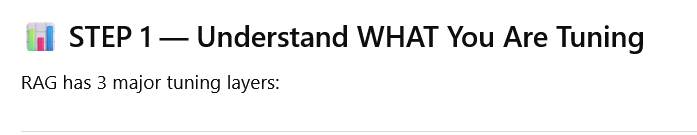
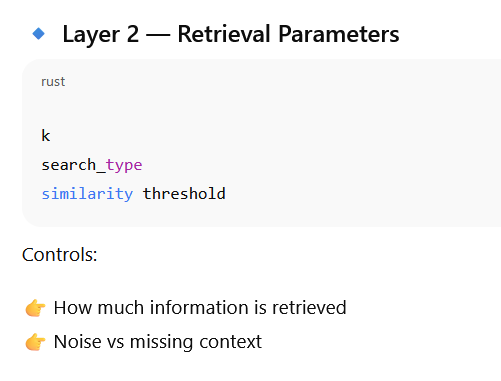
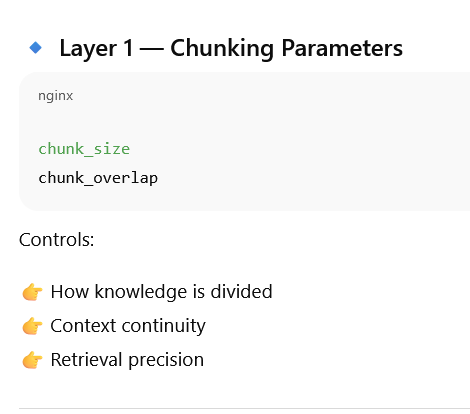
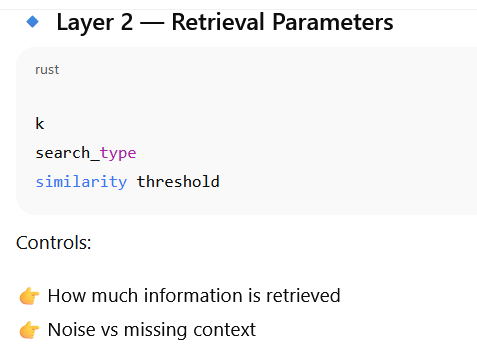
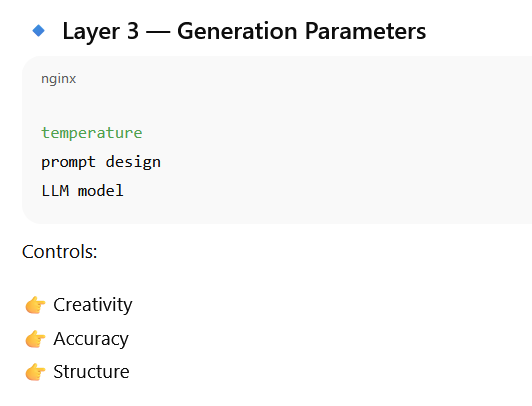

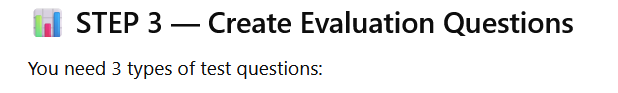
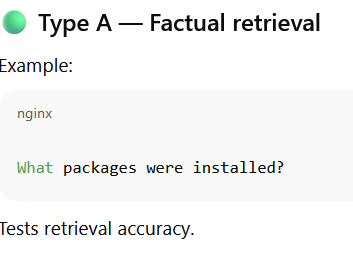
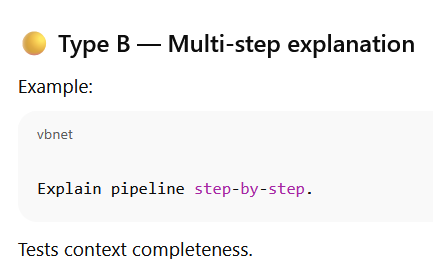
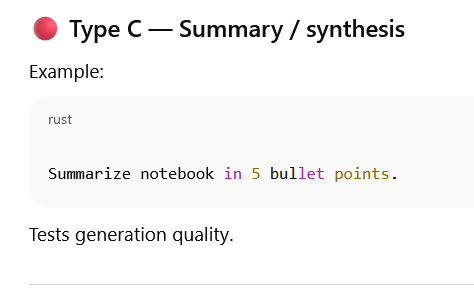

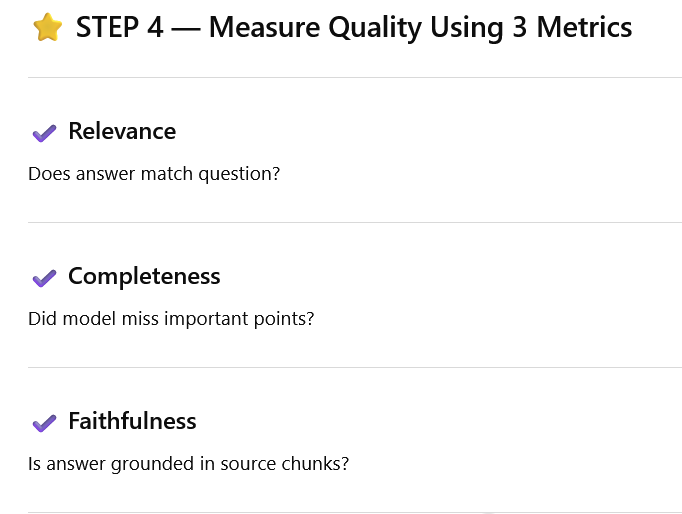

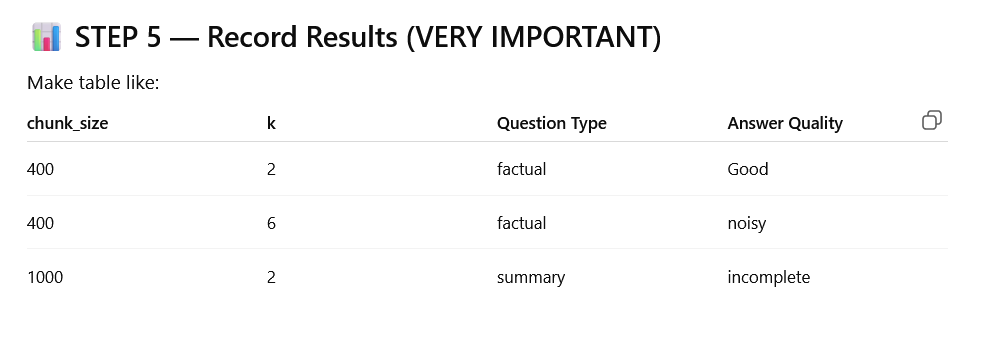


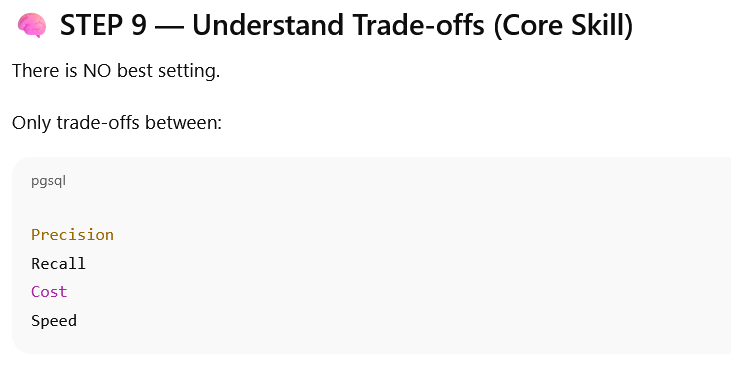

# Manuscripts
https://research.trychroma.com/evaluating-chunking?utm_source=chatgpt.com

# Learning script
https://chatgpt.com/c/69831fde-3cec-8392-aa50-2e138df83f68

In [ ]:
# ============================================================
# STEP 1: Load Knowledge Base Text File
# ============================================================

# WHY WE ARE DOING THIS:
# In RAG (Retrieval Augmented Generation), we need documents
# that the AI can search inside before answering questions.
#
# Here we load our knowledge file into Python memory.


# Pathlib helps handle file paths safely across OS
from pathlib import Path


# ------------------------------------------------------------
# Because our notebook is inside "notebooks/" folder,
# we go one level up (..) to reach project root.
# Then we enter src/ where the knowledge file is stored.
# ------------------------------------------------------------

kb_path = Path("..") / "src" / "kb_modiji.txt"


# Show full absolute path (helps debugging)
print("Knowledge file path:")
print(kb_path.resolve())


# Check if file exists BEFORE loading
print("\nDoes file exist?", kb_path.exists())


# ------------------------------------------------------------
# Now read the text file into Python string variable "text"
# encoding="utf-8" prevents Unicode errors
# errors="ignore" skips unreadable characters safely
# ------------------------------------------------------------

text = kb_path.read_text(encoding="utf-8", errors="ignore")


# ------------------------------------------------------------
# Always verify content loaded correctly
# ------------------------------------------------------------

print("\nTotal characters loaded:", len(text))

print("\nPreview of text:")
print(text[:500])  # Shows first 500 characters


In [52]:
# ============================================================
# CELL 9B: Embeddings model (same as Cell 7)
# ============================================================

import os
import dotenv

dotenv.load_dotenv("../.env")

OPENROUTER_API_KEY = os.getenv("OPENROUTER_API_KEY")
OPENROUTER_BASE_URL = os.getenv("OPENROUTER_BASE_URL")

print("Key loaded?", "YES" if OPENROUTER_API_KEY else "NO")
print("Base URL:", OPENROUTER_BASE_URL)

from langchain_openai import OpenAIEmbeddings

embeddings = OpenAIEmbeddings(
    openai_api_key=OPENROUTER_API_KEY,
    openai_api_base=OPENROUTER_BASE_URL,
    model="text-embedding-3-small"
)

# quick sanity test
test_vec = embeddings.embed_query("test")
print("✅ Embedding test length:", len(test_vec))


Key loaded? YES
Base URL: https://openrouter.ai/api/v1


AuthenticationError: Error code: 401 - {'error': {'message': 'User not found.', 'code': 401}}

## Sentence Embedding Models

- OpenAI Text Embedding large is based on the concept of Sentence Transformer
- Returns a sentence embedding vector of 3072 dimension which can be reduced.
- The context limit for this model is 8191 tokens

In [9]:
from langchain_openai import OpenAIEmbeddings
open_ai_em = OpenAIEmbeddings(
    openai_api_key=os.getenv("OPENROUTER_API_KEY"),
    openai_api_base=os.getenv("OPENROUTER_BASE_URL"),
    model="text-embedding-3-large", # Or any model on OpenRouter
    default_headers={
        "HTTP-Referer": os.getenv("APP_URL"),
        "X-Title": os.getenv("APP_NAME"),
    }
)

In [10]:
len(open_ai_em.embed_query("Hello World"))

3072

##Hugging Face Sentence Embedding Model

In [ ]:
!pip install -q langchain_huggingface sentence_transformers

In [ ]:
from langchain_huggingface import HuggingFaceEmbeddings
import transformers
import sentence_transformers

model_name = "BAAI/bge-m3"
model_kwargs = {'device': 'cuda'} # this will use GPU
hf_em = HuggingFaceEmbeddings(
    model_name=model_name,
    model_kwargs = model_kwargs)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/123 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/54.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/687 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.27G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.27G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/444 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/964 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/191 [00:00<?, ?B/s]

In [ ]:
len(hf_em.embed_query("Hello World"))

1024

- If you are working with english documents: use OpenAI- Small, Large (Paid)
- If you are working with other languages: Use BGE-M3 (This is best and opensource) (Free)

## Text Splitters

- Document Loaders: Text, PDF, WebBasedLoader
- Chunking (Text Splitting)
- Embedding Model for Sentences (Sentence Transformers)
- https://chunkviz.up.railway.app/


In [ ]:
!pip install -q langchain_community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 48.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 75.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 5.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==2.32.4, but you have requests 2.32.5 which is incompatible.


In [ ]:
# load the document
from langchain_community.document_loaders import TextLoader
loader = TextLoader('/content/kb_modiji.txt')
doc = loader.load()

In [ ]:
doc[0].page_content

'# HISTORY OF NARENDRA MODI\n\n## Early Life and Background\n\n**Birth and Family:**\n- Born: September 17, 1950, in Vadnagar, Gujarat, India\n- Parents: Damodardas Mulchand Modi (father) and Hiraben Modi (mother)\n- Family Background: Born into a lower-middle-class family of the Ghanchi-Teli (oil-presser) community\n- Siblings: Third of six children\n\n**Childhood:**\n- Helped his father run a tea stall at the Vadnagar railway station\n- Described as an average student who was more interested in theater and debates\n- Early interest in politics and public speaking\n\n## Education\n\n- Completed higher secondary education in Vadnagar\n- Bachelor\'s degree in Political Science from Delhi University (1978) through distance learning\n- Master\'s degree in Political Science from Gujarat University (1983)\n- Known to have been influenced by nationalist literature and ideology during his formative years\n\n## Early Political Career\n\n**RSS Involvement:**\n- Joined the Rashtriya Swayamsevak 

In [ ]:
!pip install -q langchain_text_splitters

In [ ]:
from langchain_text_splitters import CharacterTextSplitter
text_splitter = CharacterTextSplitter(
    separator = " ",
    chunk_size = 500,
    chunk_overlap = 10
)

# by defult the chunk overlap is 200
# that means chunk size should be more than 200
# otherwise there will be error

In [ ]:
text_splitter.split_text(doc[0].page_content)

['# HISTORY OF NARENDRA MODI\n\n## Early Life and Background\n\n**Birth and Family:**\n- Born: September 17, 1950, in Vadnagar, Gujarat, India\n- Parents: Damodardas Mulchand Modi (father) and Hiraben Modi (mother)\n- Family Background: Born into a lower-middle-class family of the Ghanchi-Teli (oil-presser) community\n- Siblings: Third of six children\n\n**Childhood:**\n- Helped his father run a tea stall at the Vadnagar railway station\n- Described as an average student who was more interested in theater and',
 "and debates\n- Early interest in politics and public speaking\n\n## Education\n\n- Completed higher secondary education in Vadnagar\n- Bachelor's degree in Political Science from Delhi University (1978) through distance learning\n- Master's degree in Political Science from Gujarat University (1983)\n- Known to have been influenced by nationalist literature and ideology during his formative years\n\n## Early Political Career\n\n**RSS Involvement:**\n- Joined the Rashtriya Swaya

**Recursive Character Text Splitter**
- Rule based approach
- Splits on the rules of sentence formation
- Break on Paragraph
- Then on Line
- Then on Special Character
- Then on Space
- Then of Characters

In [ ]:
from langchain_text_splitters import RecursiveCharacterTextSplitter
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size = 500,
    chunk_overlap = 0,
    separators=["\n\n", "\n", " "]
    # separators=["\n\n", "\n", ".", "?", "!", " ", ""]
)

In [ ]:
text_splitter.split_text(doc[0].page_content)

['# HISTORY OF NARENDRA MODI\n\n## Early Life and Background\n\n**Birth and Family:**\n- Born: September 17, 1950, in Vadnagar, Gujarat, India\n- Parents: Damodardas Mulchand Modi (father) and Hiraben Modi (mother)\n- Family Background: Born into a lower-middle-class family of the Ghanchi-Teli (oil-presser) community\n- Siblings: Third of six children',
 '**Childhood:**\n- Helped his father run a tea stall at the Vadnagar railway station\n- Described as an average student who was more interested in theater and debates\n- Early interest in politics and public speaking\n\n## Education',
 "- Completed higher secondary education in Vadnagar\n- Bachelor's degree in Political Science from Delhi University (1978) through distance learning\n- Master's degree in Political Science from Gujarat University (1983)\n- Known to have been influenced by nationalist literature and ideology during his formative years\n\n## Early Political Career",
 '**RSS Involvement:**\n- Joined the Rashtriya Swayamseva

# WHY WE DIDNT DO SEMANTIC WITH MODIJI.TXT
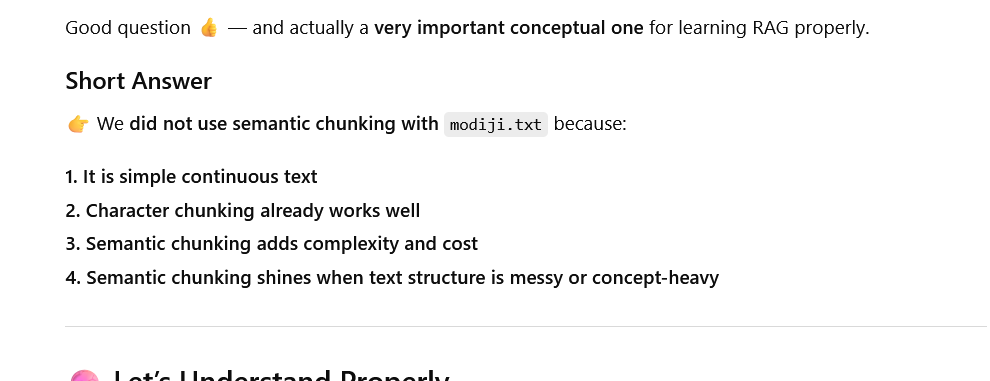
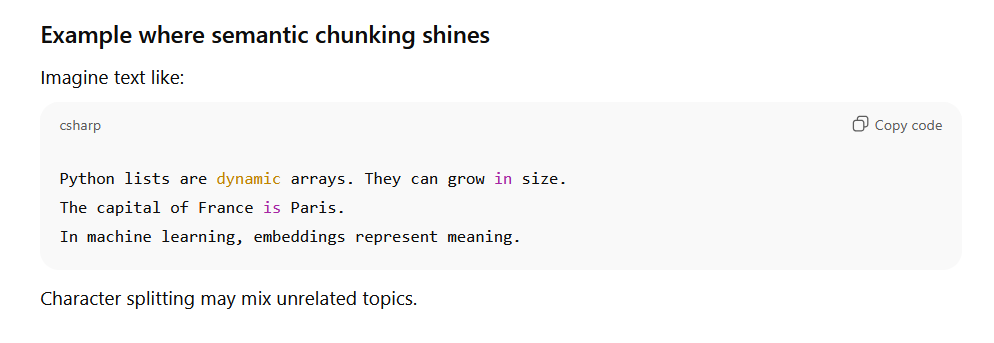
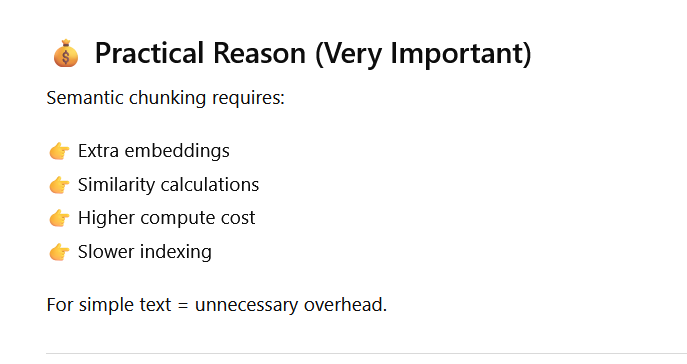
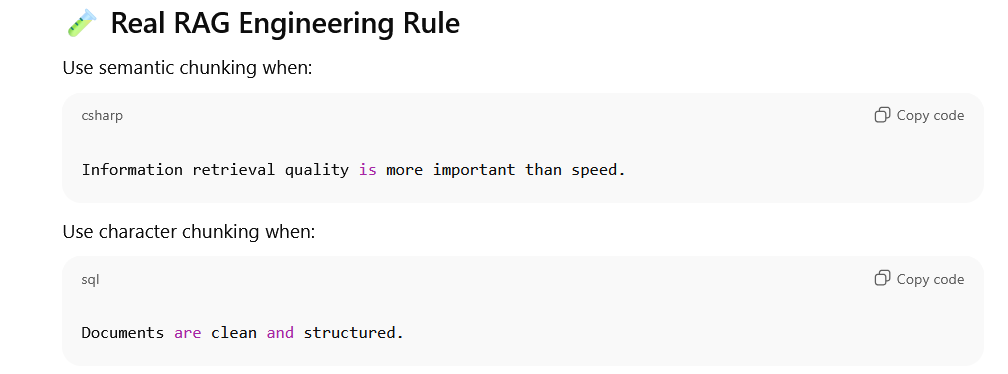

## Class-2 (1st Feb)

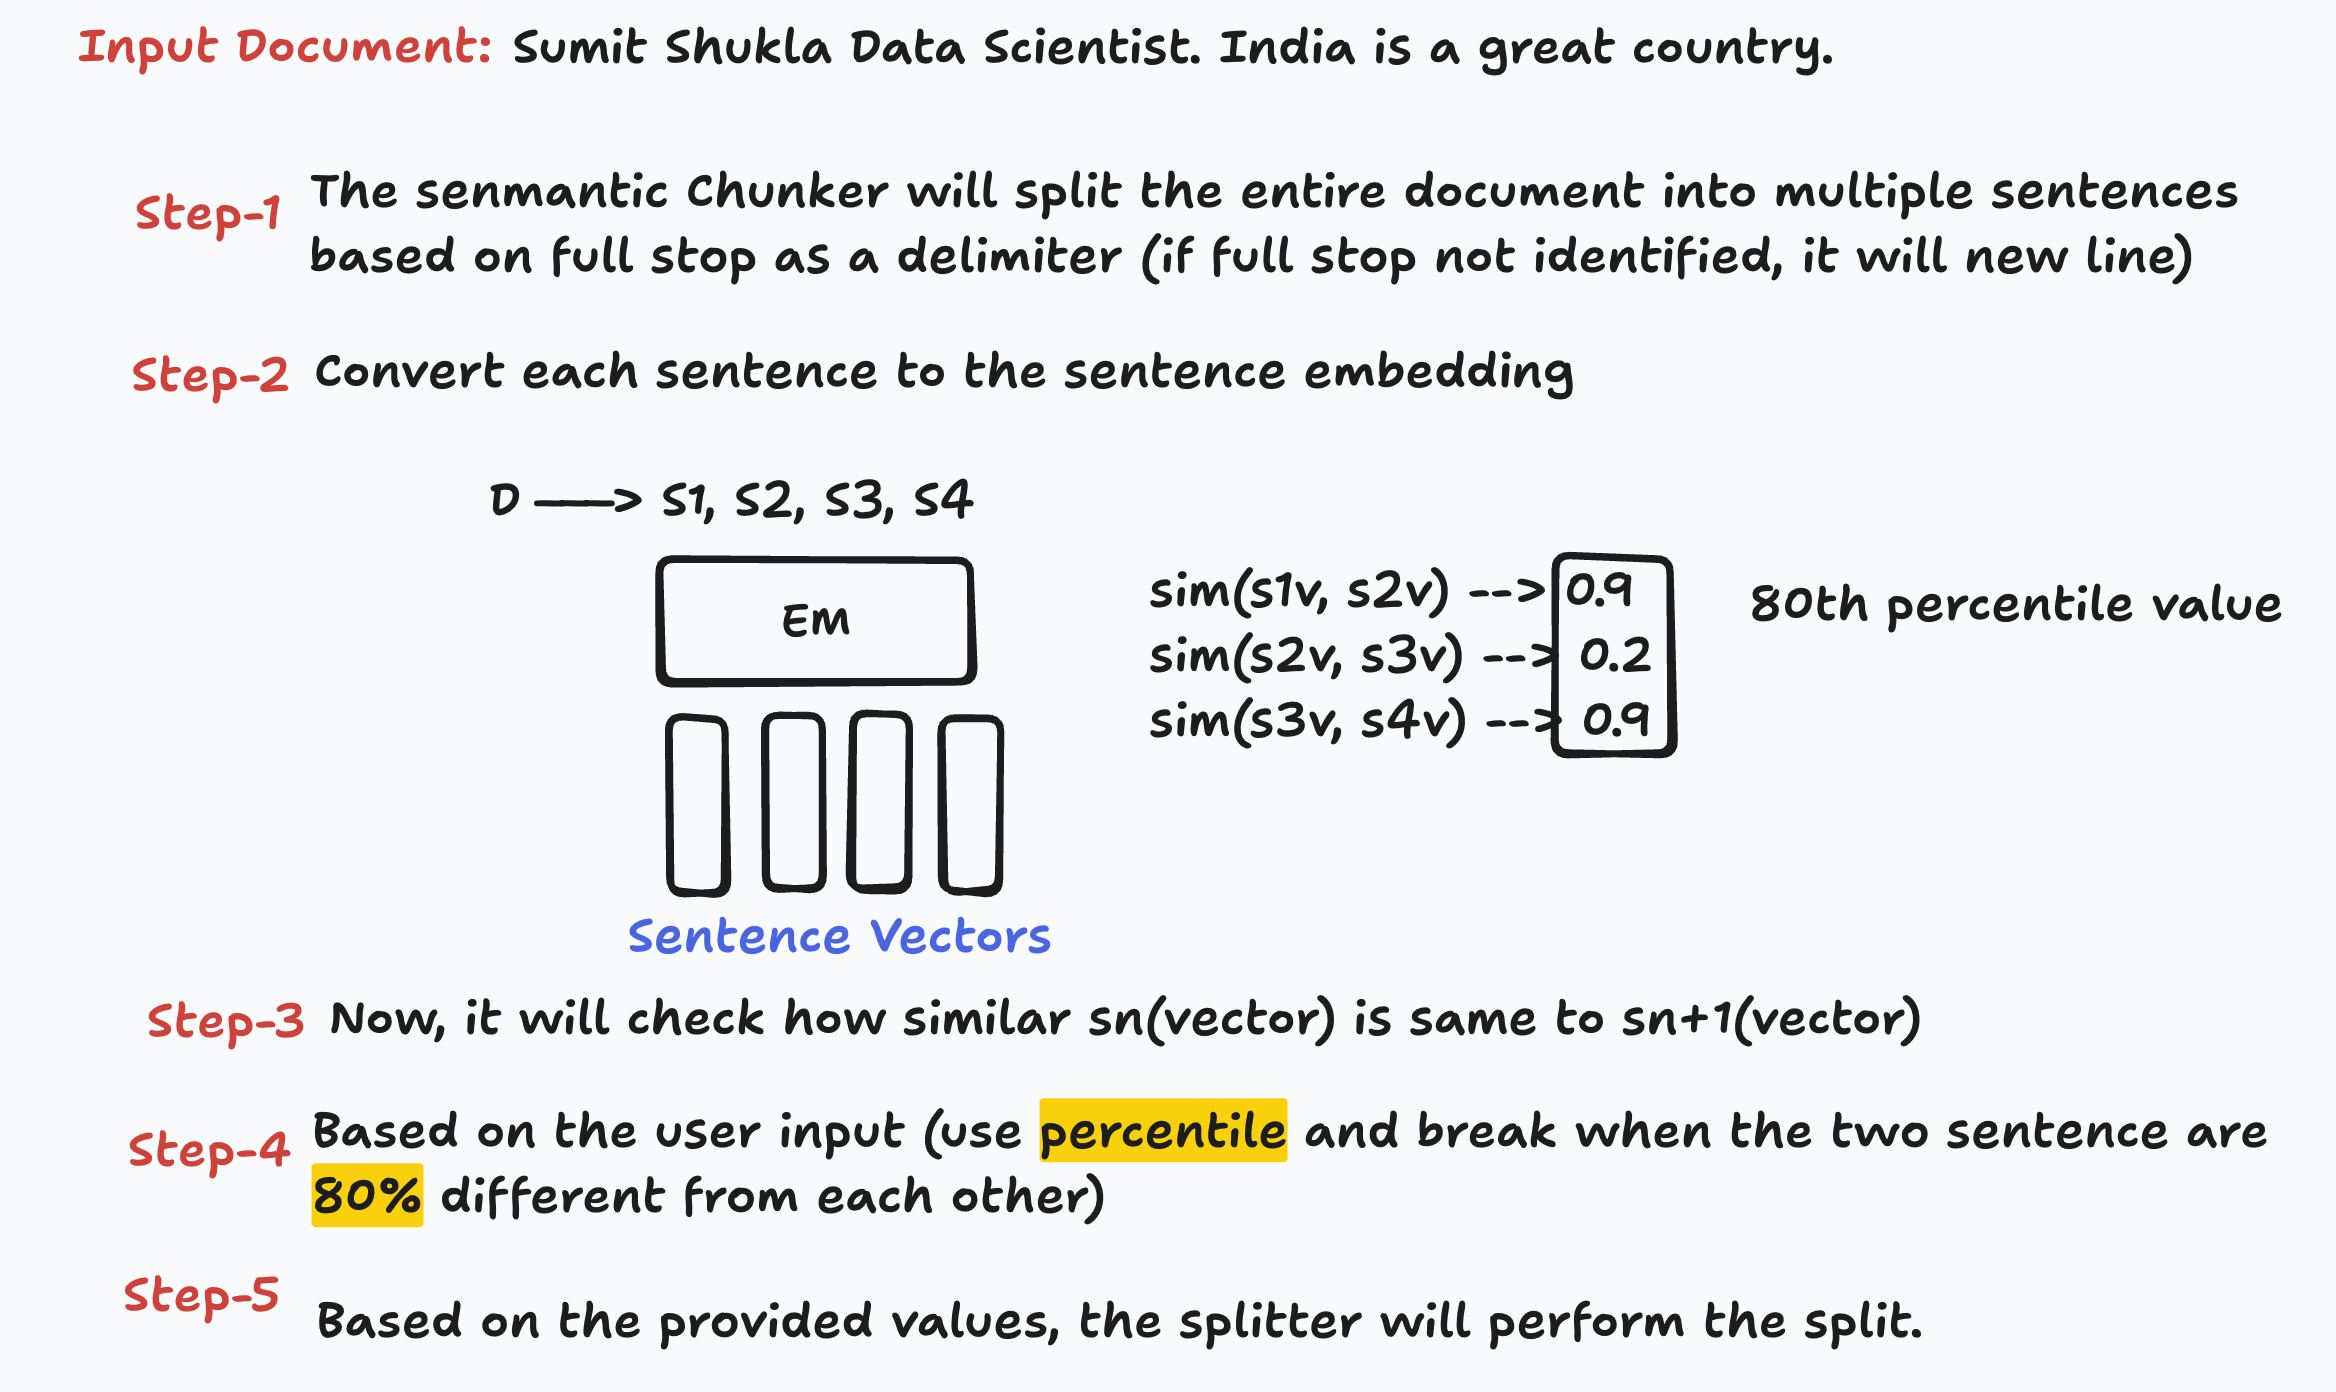

In [34]:
text = """
Quantum computing represents a revolutionary approach to processing information. Unlike classical computers that use bits representing 0 or 1, quantum computers use qubits that can exist in superposition, representing both states simultaneously. This property, combined with quantum entanglement, allows quantum computers to solve certain problems exponentially faster than classical computers. Companies like IBM, Google, and startups are racing to build practical quantum computers. The technology promises breakthroughs in cryptography, drug discovery, financial modeling, and optimization problems that are currently intractable for traditional computers.

The Mediterranean diet has long been celebrated as one of the healthiest eating patterns in the world. Originating from countries bordering the Mediterranean Sea, this diet emphasizes whole grains, fresh fruits and vegetables, olive oil, fish, and moderate amounts of dairy and wine. Research consistently shows that people following this diet have lower rates of heart disease, diabetes, and certain cancers. The anti-inflammatory properties of olive oil, combined with omega-3 fatty acids from fish and antioxidants from produce, create a powerful nutritional profile. Beyond physical health, the Mediterranean lifestyle promotes social eating and mindful enjoyment of meals.
"""

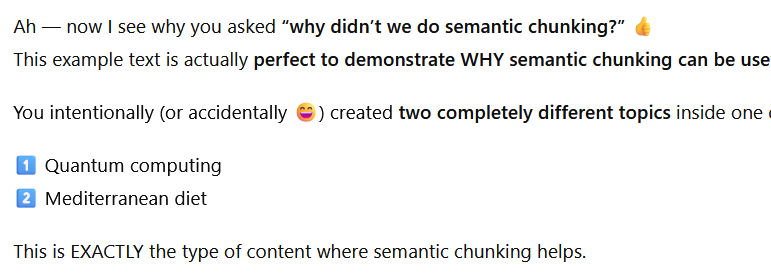
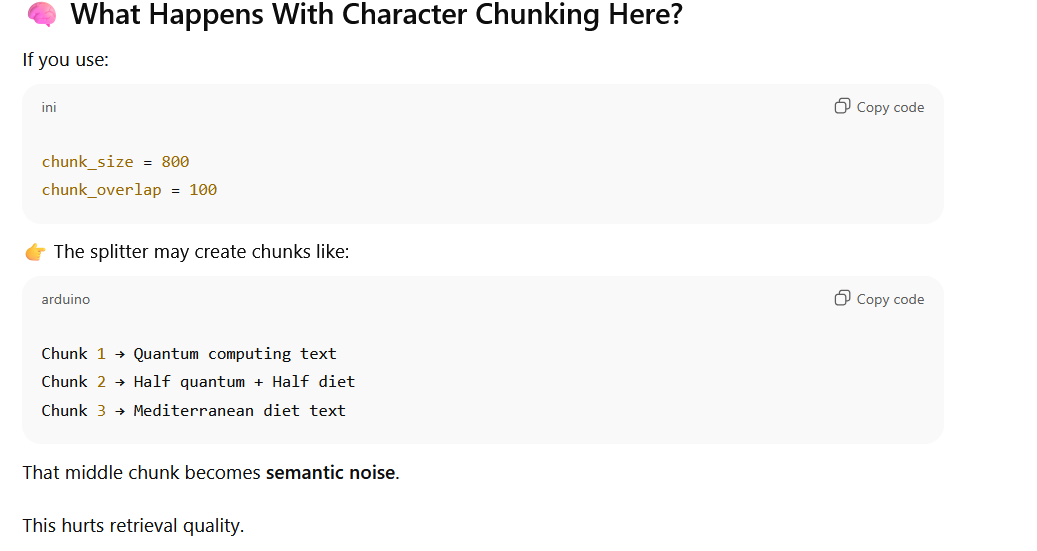
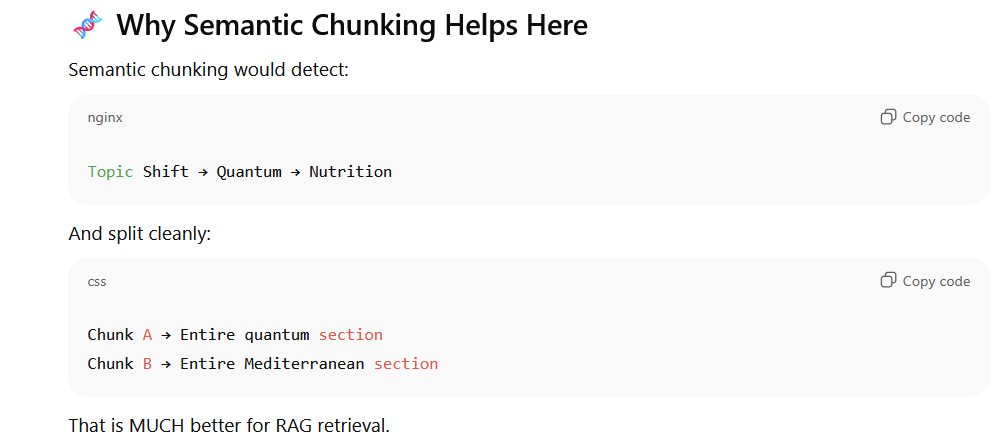

In [35]:
print(text)


Quantum computing represents a revolutionary approach to processing information. Unlike classical computers that use bits representing 0 or 1, quantum computers use qubits that can exist in superposition, representing both states simultaneously. This property, combined with quantum entanglement, allows quantum computers to solve certain problems exponentially faster than classical computers. Companies like IBM, Google, and startups are racing to build practical quantum computers. The technology promises breakthroughs in cryptography, drug discovery, financial modeling, and optimization problems that are currently intractable for traditional computers.

The Mediterranean diet has long been celebrated as one of the healthiest eating patterns in the world. Originating from countries bordering the Mediterranean Sea, this diet emphasizes whole grains, fresh fruits and vegetables, olive oil, fish, and moderate amounts of dairy and wine. Research consistently shows that people following this

In the above example both the sentences follows two different contextual meaning and using any of the text splitter we will not be able to achieve the right chunk split.

- Whenever we have a document with multiple content related to different context, we can use Senmantic Chunker.

In [36]:
!pip install -q langchain_experimental langchain_openai

In [45]:
from langchain_experimental.text_splitter import SemanticChunker
from langchain_openai import OpenAIEmbeddings

from langchain_openai import OpenAIEmbeddings
open_ai_em = OpenAIEmbeddings(
    openai_api_key=os.getenv("OPENAI_API_KEY"),
    model="text-embedding-3-small", # Or any model on OpenRouter
    default_headers={
        "HTTP-Referer": os.getenv("APP_URL"),
        "X-Title": os.getenv("APP_NAME"),
    }
)

splitter = SemanticChunker(
    embeddings=open_ai_em,
    breakpoint_threshold_type  = "percentile",
    breakpoint_threshold_amount = 80
)

text = """
Quantum computing represents a revolutionary approach to processing information. Unlike classical computers that use bits representing 0 or 1, quantum computers use qubits that can exist in superposition, representing both states simultaneously. This property, combined with quantum entanglement, allows quantum computers to solve certain problems exponentially faster than classical computers. Companies like IBM, Google, and startups are racing to build practical quantum computers. The technology promises breakthroughs in cryptography, drug discovery, financial modeling, and optimization problems that are currently intractable for traditional computers.

The Mediterranean diet has long been celebrated as one of the healthiest eating patterns in the world. Originating from countries bordering the Mediterranean Sea, this diet emphasizes whole grains, fresh fruits and vegetables, olive oil, fish, and moderate amounts of dairy and wine. Research consistently shows that people following this diet have lower rates of heart disease, diabetes, and certain cancers. The anti-inflammatory properties of olive oil, combined with omega-3 fatty acids from fish and antioxidants from produce, create a powerful nutritional profile. Beyond physical health, the Mediterranean lifestyle promotes social eating and mindful enjoyment of meals.
"""

chunk = splitter.create_documents([text])

# =====================================================
# LOOP THROUGH CHUNKS
# =====================================================
for i, chunk in enumerate(chunk):

    print("\n" + "="*60)
    print(f"Chunk {i}")
    print("="*60)

    content = chunk.page_content.strip()

    print("Length:", len(content))
    print("\nContent Preview:\n")
    print(content[:500])   # show first 500 characters




Chunk 0
Length: 659

Content Preview:

Quantum computing represents a revolutionary approach to processing information. Unlike classical computers that use bits representing 0 or 1, quantum computers use qubits that can exist in superposition, representing both states simultaneously. This property, combined with quantum entanglement, allows quantum computers to solve certain problems exponentially faster than classical computers. Companies like IBM, Google, and startups are racing to build practical quantum computers. The technology 

Chunk 1
Length: 677

Content Preview:

The Mediterranean diet has long been celebrated as one of the healthiest eating patterns in the world. Originating from countries bordering the Mediterranean Sea, this diet emphasizes whole grains, fresh fruits and vegetables, olive oil, fish, and moderate amounts of dairy and wine. Research consistently shows that people following this diet have lower rates of heart disease, diabetes, and certain cancers. The anti-

In [47]:
import os
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from langchain_experimental.text_splitter import SemanticChunker
from langchain_openai import OpenAIEmbeddings
import re

# ----------------------------
# Embeddings
# ----------------------------
emb = OpenAIEmbeddings(
    api_key=os.getenv("OPENAI_API_KEY"),
    model="text-embedding-3-small"
)

# ----------------------------
# Split text into sentences
# ----------------------------
sentences = re.split(r'(?<=[.!?])\s+', text.strip())

print("Total sentences:", len(sentences))

# ----------------------------
# Create embeddings for sentences
# ----------------------------
sentence_embeddings = emb.embed_documents(sentences)

# ----------------------------
# Calculate cosine distance between adjacent sentences
# ----------------------------
distances = []

for i in range(len(sentence_embeddings)-1):
    sim = cosine_similarity(
        [sentence_embeddings[i]],
        [sentence_embeddings[i+1]]
    )[0][0]

    distance = 1 - sim
    distances.append(distance)

# ----------------------------
# Calculate percentile threshold
# ----------------------------
threshold = np.percentile(distances, 80)

print("\n👉 80th Percentile Threshold Value:", threshold)

# ----------------------------
# Show distances
# ----------------------------
print("\nDistances Between Sentences:")
for i, d in enumerate(distances):
    print(f"Sentence {i} → {i+1} Distance:", round(d, 4))

# ----------------------------
# Show where chunk breaks occur
# ----------------------------
print("\n🚨 Breakpoints (distance > threshold):")

for i, d in enumerate(distances):
    if d > threshold:
        print(f"Break after sentence {i}")


Total sentences: 10

👉 80th Percentile Threshold Value: 0.6408410907963318

Distances Between Sentences:
Sentence 0 → 1 Distance: 0.4482
Sentence 1 → 2 Distance: 0.381
Sentence 2 → 3 Distance: 0.4844
Sentence 3 → 4 Distance: 0.5071
Sentence 4 → 5 Distance: 0.9125
Sentence 5 → 6 Distance: 0.4348
Sentence 6 → 7 Distance: 0.6191
Sentence 7 → 8 Distance: 0.6734
Sentence 8 → 9 Distance: 0.5725

🚨 Breakpoints (distance > threshold):
Break after sentence 4
Break after sentence 7


In [39]:
len(chunk)

3

In [40]:
chunk[0].page_content

'\nQuantum computing represents a revolutionary approach to processing information. Unlike classical computers that use bits representing 0 or 1, quantum computers use qubits that can exist in superposition, representing both states simultaneously. This property, combined with quantum entanglement, allows quantum computers to solve certain problems exponentially faster than classical computers. Companies like IBM, Google, and startups are racing to build practical quantum computers. The technology promises breakthroughs in cryptography, drug discovery, financial modeling, and optimization problems that are currently intractable for traditional computers.'

In [41]:
chunk[1].page_content

'The Mediterranean diet has long been celebrated as one of the healthiest eating patterns in the world. Originating from countries bordering the Mediterranean Sea, this diet emphasizes whole grains, fresh fruits and vegetables, olive oil, fish, and moderate amounts of dairy and wine. Research consistently shows that people following this diet have lower rates of heart disease, diabetes, and certain cancers. The anti-inflammatory properties of olive oil, combined with omega-3 fatty acids from fish and antioxidants from produce, create a powerful nutritional profile. Beyond physical health, the Mediterranean lifestyle promotes social eating and mindful enjoyment of meals.'

In [43]:
chunk[2].page_content

''

In [ ]:
splitter.create_documents(["My name is sumit. India is a great country"])

[Document(metadata={}, page_content='My name is sumit. India is a great country')]

**Contextualized Chunking**

In [ ]:
! pip install -q langchain_text_splitters langchain_community

In [ ]:
from langchain_community.document_loaders import TextLoader
loader = TextLoader('/content/kb_modiji.txt')
doc = loader.load()

In [ ]:
from langchain_core.prompts import ChatPromptTemplate
from langchain_openai import ChatOpenAI
from langchain_text_splitters import RecursiveCharacterTextSplitter
from langchain_core.documents import Document

import os
from langchain_openai import ChatOpenAI
llm = ChatOpenAI(
    openai_api_key=os.getenv("OPENROUTER_API_KEY"),
    openai_api_base=os.getenv("OPENROUTER_BASE_URL"),
    model_name="gpt-4o-mini-2024-07-18", # Or any model on OpenRouter
    default_headers={
        "HTTP-Referer": os.getenv("APP_URL"),
        "X-Title": os.getenv("APP_NAME"),
    }
)

from langchain_text_splitters import RecursiveCharacterTextSplitter
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size = 500,
    chunk_overlap = 0,
    separators=["\n\n", "\n", " "]
    # separators=["\n\n", "\n", ".", "?", "!", " ", ""]
)

document_text = doc[0].page_content
# Here we can have one more chunking which will generate bigger chunks which
# we can provide to LLM as a Doc
chunks = text_splitter.split_text(document_text)


context_prompt = ChatPromptTemplate.from_template(
    """
    <document>
    {doc_content}
    </document>

    Here is a chunk we are sending to an embedding model:
    <chunk>
    {chunk_content}
    </chunk>

    Please give a short (1-2 sentence) context to situate this chunk within the overall document for the purposes of improving search retrieval.
    Answer only with the context string.
    """
)

new_chunk = []

for c in chunks:

  final_prompt = context_prompt.format(doc_content = document_text, chunk_content = c)
  response = llm.invoke(final_prompt)
  new_chunk.append(Document(page_content = response.content, metadata = {"original_chunk":c}))




In [ ]:
new_chunk[0]

Document(metadata={'original_chunk': '# HISTORY OF NARENDRA MODI\n\n## Early Life and Background\n\n**Birth and Family:**\n- Born: September 17, 1950, in Vadnagar, Gujarat, India\n- Parents: Damodardas Mulchand Modi (father) and Hiraben Modi (mother)\n- Family Background: Born into a lower-middle-class family of the Ghanchi-Teli (oil-presser) community\n- Siblings: Third of six children'}, page_content="The chunk provides an overview of Narendra Modi's early life and background, detailing his birth, family, and upbringing, which sets the foundation for understanding his subsequent political career and leadership style as Prime Minister of India.")

In [ ]:
new_chunk[9]

Document(metadata={'original_chunk': '*Major Initiatives:*\n- Swachh Bharat Abhiyan (Clean India Mission)\n- Make in India campaign\n- Digital India initiative\n- Jan Dhan Yojana (financial inclusion)\n- Skill India program\n- Pradhan Mantri Ujjwala Yojana (LPG connections)\n- Goods and Services Tax (GST) implementation (2017)\n- Demonetization (November 2016)'}, page_content="This chunk details the major initiatives launched during Narendra Modi's first term as Prime Minister of India from 2014 to 2019, highlighting key policies aimed at economic development, social welfare, and governance reforms.")

## Proposition Chunking

In [50]:
import os
from langchain_core.prompts import PromptTemplate
from langchain_openai import ChatOpenAI
llm = ChatOpenAI(
    openai_api_key=os.getenv("OPENAI_API_KEY"),
    model_name="gpt-4o-mini-2024-07-18", # Or any model on OpenRouter
    default_headers={
        "HTTP-Referer": os.getenv("APP_URL"),
        "X-Title": os.getenv("APP_NAME"),
    }
)

PROPOSITION_PROMPT = PromptTemplate.from_template(
    """
    You are an expert data engineer building a RAG system.
    Your task is to decompose the "Current Text" into simple, atomic propositions (facts).

    ### INPUT DATA
    1. **Document Title**: {title} (Use this for global context)
    2. **Previous Context**: {previous_window} (READ-ONLY. Use this ONLY to resolve pronouns like 'he', 'it', 'they' in the current text.)
    3. **Current Text**: {current_chunk} (EXTRACT facts from this text only.)

    ### RULES
    - **Atomic Facts**: Each sentence must be a standalone fact.
    - **Coreference Resolution**: If 'Current Text' says "He decided...", and 'Previous Context' identifies him as "Elon Musk", write "Elon Musk decided...".
    - **Isolation**: DO NOT create propositions from the 'Previous Context'. Only the 'Current Text'.

    ### OUTPUT
    Return a list of sentences separated by newlines.
    """
)

proposition_chain = PROPOSITION_PROMPT | llm

document_title = "Description about Mr.Narendra Modi (PM of India)"



from langchain_text_splitters import RecursiveCharacterTextSplitter
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size = 500,
    chunk_overlap = 0,
    separators=["\n\n", "\n", " "]
    # separators=["\n\n", "\n", ".", "?", "!", " ", ""]
)

chunks = text_splitter.split_text(text)

final_chunk = []
window_size = 2
history = []

for i, current_chunk in enumerate(chunks):
  if not current_chunk.strip():
    continue

  previous_chunk = " ".join(history[-window_size:]) if history else "No Previous Context"
  response = proposition_chain.invoke({
      "title": document_title,
      "previous_window": previous_chunk,
      "current_chunk": current_chunk
  })
  p = response.content.split("\n")
  clean_p = [i.strip() for i in p if i.strip()]
  final_chunk.extend(clean_p)
  history.append(current_chunk)



In [ ]:
c = ["a", "b", "c", "d"]
for i in enumerate(c):
  print(i)

(0, 'a')
(1, 'b')
(2, 'c')
(3, 'd')


In [ ]:
c = ["a", "b", "c", "d"]
" ".join(c[-2:])

'c d'

In [ ]:
"Sachin is a great player\nSachin played for India"

In [ ]:
final_chunk

['- Narendra Modi was born on September 17, 1950, in Vadnagar, Gujarat, India.',
 "- Narendra Modi's father is Damodardas Mulchand Modi.",
 "- Narendra Modi's mother is Hiraben Modi.",
 '- Narendra Modi was born into a lower-middle-class family of the Ghanchi-Teli (oil-presser) community.',
 '- Narendra Modi is the third of six children.',
 '- Narendra Modi helped his father run a tea stall at the Vadnagar railway station.',
 '- Narendra Modi was described as an average student.',
 '- Narendra Modi was more interested in theater and debates than academics.',
 '- Narendra Modi had an early interest in politics and public speaking.',
 '- Narendra Modi completed higher secondary education in Vadnagar.',
 "- Narendra Modi obtained a Bachelor's degree in Political Science from Delhi University in 1978 through distance learning.",
 "- Narendra Modi earned a Master's degree in Political Science from Gujarat University in 1983.",
 '- Narendra Modi was influenced by nationalist literature and i

**Summarize**

- RAG Components
    - Embedding Model
    - Chunking
    - Vector DB
    - Reterival
    - LLM
- Embedding Model
    - Sentence Transformer: BERT
    - OpenAI Embeddings
    - Hugging Face BGE-M3
- Document Loaders
    - Text Loader
    - PyPDF Loader
    - WebBased Loaders
- Chunking Techniques
    - CharacterTextSplitter
    - RecursiveCharacterTextSplitter
    - Semantic Chunking
    - Contextulised Chunking
    - Proposition Chunking

In [ ]:
# AI Chatgpt modified generated

import os
import re
from langchain_core.prompts import PromptTemplate
from langchain_openai import ChatOpenAI
from langchain_community.document_loaders import TextLoader
from langchain_text_splitters import RecursiveCharacterTextSplitter

# ----------------------------
# LLM (OpenRouter)
# ----------------------------
llm = ChatOpenAI(
    api_key=os.getenv("OPENAI_API_KEY"),
    model="gpt-4o-mini",
    temperature=0.2,
    default_headers={
        "HTTP-Referer": os.getenv("APP_URL") or "http://localhost",
        "X-Title": os.getenv("APP_NAME") or "RAG Notebook",
    },
)

PROPOSITION_PROMPT = PromptTemplate.from_template(
    """
You are an expert data engineer building a RAG system.
Your task is to decompose the "Current Text" into simple, atomic propositions (facts).

### INPUT DATA
1. Document Title: {title} (Use this for global context)
2. Previous Context: {previous_window} (READ-ONLY. Use ONLY to resolve pronouns like 'he', 'it', 'they'.)
3. Current Text: {current_chunk} (EXTRACT facts from this text only.)

### RULES
- Atomic facts: each line must be a standalone fact.
- Coreference resolution: resolve pronouns using Previous Context if needed.
- Isolation: DO NOT create propositions from Previous Context. Only Current Text.
- Do not add commentary or headings.

### OUTPUT
Return ONLY the propositions, one per line.
"""
)

proposition_chain = PROPOSITION_PROMPT | llm

document_title = "Description about Mr. Narendra Modi (PM of India)"



print("Loaded characters:", len(text))

# ----------------------------
# Chunking (for LLM input)
# ----------------------------
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=500,
    chunk_overlap=0,
    separators=["\n\n", "\n", " "]
)

# I loaded propoisiton file here
# I should have loaded the Modiji file.
chunks = text_splitter.split_text(text)

print("Total text chunks:", len(chunks))

# ----------------------------
# Helpers
# ----------------------------
def clean_lines(lines):
    cleaned = []
    for line in lines:
        line = line.strip()
        if not line:
            continue

        # remove common bullet / numbering prefixes
        line = re.sub(r"^[-•]\s*", "", line)
        line = re.sub(r"^\d+[\).\s]+", "", line)

        # remove surrounding quotes
        line = line.strip("\"'“”")
        if line:
            cleaned.append(line)
    return cleaned

# ----------------------------
# Proposition extraction loop
# ----------------------------
final_props = []
window_size = 2
history = []

for idx, current_chunk in enumerate(chunks, start=1):
    if not current_chunk.strip():
        continue

    previous_chunk = " ".join(history[-window_size:]) if history else "No Previous Context"

    response = proposition_chain.invoke({
        "title": document_title,
        "previous_window": previous_chunk,
        "current_chunk": current_chunk
    })

    # Split into lines and clean
    raw_lines = response.content.split("\n")
    props = clean_lines(raw_lines)

    final_props.extend(props)
    history.append(current_chunk)

    # progress logging every N chunks
    if idx % 5 == 0 or idx == 1 or idx == len(chunks):
        print(f"Processed chunk {idx}/{len(chunks)} | props so far: {len(final_props)}")

print("\n✅ Total propositions extracted:", len(final_props))

# Optional: preview first 20
print("\n--- Preview (first 20 propositions) ---")
for j, p in enumerate(final_props[:20], start=1):
    print(f"{j}. {p}")


Loaded characters: 1340
Total text chunks: 4
Processed chunk 1/4 | props so far: 7
Processed chunk 4/4 | props so far: 28

✅ Total propositions extracted: 28

--- Preview (first 20 propositions) ---
1. Quantum computing represents a revolutionary approach to processing information.
2. Classical computers use bits representing 0 or 1.
3. Quantum computers use qubits that can exist in superposition.
4. Qubits can represent both states simultaneously.
5. Quantum entanglement allows quantum computers to solve certain problems exponentially faster than classical computers.
6. Companies like IBM and Google are racing to build practical quantum computers.
7. Startups are also racing to build practical quantum computers.
8. Quantum computing promises breakthroughs in cryptography.
9. Quantum computing promises breakthroughs in drug discovery.
10. Quantum computing promises breakthroughs in financial modeling.
11. Quantum computing promises breakthroughs in optimization problems.
12. Quantum co

In [54]:
from langchain_core.documents import Document
from langchain_openai import OpenAIEmbeddings
from langchain_chroma import Chroma
import os

# 1) Embeddings (OpenRouter)
embeddings = OpenAIEmbeddings(
    model="text-embedding-3-small",
    api_key=os.getenv("OPENAI_API_KEY"),
    default_headers={
        "HTTP-Referer": os.getenv("APP_URL") or "http://localhost",
        "X-Title": os.getenv("APP_NAME") or "RAG Notebook",
    }
)

# 2) Convert propositions -> Documents (add metadata so sources are traceable)
prop_docs = [
    Document(page_content=p, metadata={"type": "proposition", "idx": i})
    for i, p in enumerate(final_props)
]

print("Proposition documents:", len(prop_docs))

# 3) Build vector DB
vectordb_props = Chroma.from_documents(
    documents=prop_docs,
    embedding=embeddings,
    persist_directory="../chroma_db_modiji_props"
)

print("✅ Proposition Vector DB count:", vectordb_props._collection.count())


Proposition documents: 28
✅ Proposition Vector DB count: 28


In [56]:
from langchain_openai import ChatOpenAI
from langchain_classic.chains import RetrievalQA
import os

retriever = vectordb_props.as_retriever(search_kwargs={"k": 12})

llm = ChatOpenAI(
    api_key=os.getenv("OPENAI_API_KEY"),
    model="gpt-4o-mini",
    temperature=0.2,
    default_headers={
        "HTTP-Referer": os.getenv("APP_URL") or "http://localhost",
        "X-Title": os.getenv("APP_NAME") or "RAG Notebook",
    }
)

qa = RetrievalQA.from_chain_type(
    llm=llm,
    chain_type="stuff",
    retriever=retriever,
    return_source_documents=True
)

question = "Summarize Modi's key initiatives mentioned in this file in 6 bullet points."
result = qa.invoke({"query": question})

print("✅ ANSWER:\n")
print(result["result"])

print("\n\n📌 SOURCES USED (top propositions):\n")
for i, d in enumerate(result["source_documents"], start=1):
    print(f"{i}. ({d.metadata.get('idx')}) {d.page_content}")


✅ ANSWER:

I don't know.


📌 SOURCES USED (top propositions):

1. (8) Quantum computing promises breakthroughs in drug discovery.
2. (7) Quantum computing promises breakthroughs in cryptography.
3. (10) Quantum computing promises breakthroughs in optimization problems.
4. (9) Quantum computing promises breakthroughs in financial modeling.
5. (6) Startups are also racing to build practical quantum computers.
6. (0) Quantum computing represents a revolutionary approach to processing information.
7. (5) Companies like IBM and Google are racing to build practical quantum computers.
8. (3) Qubits can represent both states simultaneously.
9. (25) Fish and antioxidants from produce create a powerful nutritional profile.
10. (17) The Mediterranean diet emphasizes fish.
11. (11) Quantum computing can solve problems that are currently intractable for traditional computers.
12. (14) The Mediterranean diet emphasizes whole grains.


## Comparability Controls (Locked Across Runs)

**Docs**
- modiji: kb_modiji.txt
- quantum: quantum.txt

**Chunking strategies**
- recursive: cs500_ol0, cs800_ol100
- semantic: p70, p80, p90 (record actual numeric threshold)
- proposition: w2 (window_size=2), prompt_version=prop_v1

**Embedding models**
- remote: openrouter_text-embedding-3-small
- local: (later) local_bge-small / local_e5-small

**Retrieval comparability**
- Evaluate at fixed `k` AND fixed `char_budget` (e.g., 3000 chars)
- Use both search types:
  - similarity
  - mmr (k=20, fetch_k=80, lambda=0.5)

**LLM comparability**
- Answer model fixed: gpt-4o-mini, temperature=0.2
- Prompt version fixed: ans_v1 (forces answer from context, says "Not found" only if truly missing)

**Metrics**
- Retrieval-only: relevant@k, hit@k (manual labels for now)
- Answer: faithfulness(1-5), completeness(1-5), concise(1-5), overall(1-5)

**Run naming**
run_id = {doc}-{chunker}-{params}-{embedder}-{date}
persist_directory = ../chroma_runs/{run_id}


In [ ]:
# Code cell template (Run registry + strict unique naming + logging)
from pathlib import Path
import json, time, hashlib
import pandas as pd

RUN_DATE = "20260205"
ROOT = Path("..")
PERSIST_ROOT = ROOT / "chroma_runs"
RESULTS_ROOT = ROOT / "runs"
PERSIST_ROOT.mkdir(exist_ok=True)
RESULTS_ROOT.mkdir(exist_ok=True)

def short_hash(s: str, n=8) -> str:
    return hashlib.sha1(s.encode("utf-8")).hexdigest()[:n]

def make_run_id(doc_id, chunker, params, embedder_id, date_tag=RUN_DATE):
    # keep it stable + filesystem-safe
    return f"{doc_id}-{chunker}-{params}-{embedder_id}-{date_tag}"

def run_path(run_id: str) -> Path:
    return PERSIST_ROOT / run_id

# Run registry dataframe (append-only)
REGISTRY_PATH = RESULTS_ROOT / "run_registry.csv"

def append_registry(row: dict):
    df = pd.DataFrame([row])
    if REGISTRY_PATH.exists():
        df.to_csv(REGISTRY_PATH, mode="a", header=False, index=False)
    else:
        df.to_csv(REGISTRY_PATH, index=False)

print("Registry:", REGISTRY_PATH.resolve())
print("Persist root:", PERSIST_ROOT.resolve())


In [ ]:
# Code cell template (retrieval budget normalization: k vs char_budget)
# This makes methods actually comparable.
def retrieve_with_char_budget(vectordb, query: str, fetch_k: int = 50, char_budget: int = 3000):
    # grab more first, then trim by char budget
    docs = vectordb.similarity_search(query, k=fetch_k)
    selected = []
    total = 0
    for d in docs:
        txt = d.page_content.strip()
        if not txt:
            continue
        if total + len(txt) > char_budget and selected:
            break
        selected.append(d)
        total += len(txt)
    return selected, total


In [ ]:
#Code cell template (MMR retriever option)

#This is a key “missing parameter” for fair comparisons (diversity vs similarity).
def get_retriever(vectordb, search_type="similarity", k=8, fetch_k=80, lambda_mult=0.5):
    if search_type == "mmr":
        return vectordb.as_retriever(
            search_type="mmr",
            search_kwargs={"k": k, "fetch_k": fetch_k, "lambda_mult": lambda_mult}
        )
    return vectordb.as_retriever(search_kwargs={"k": k})


In [ ]:
# Code cell template (fixed answer prompt version)
from langchain_core.prompts import PromptTemplate

ANSWER_PROMPT_V1 = PromptTemplate.from_template("""
You must answer ONLY using the CONTEXT.
If the answer is truly not in the context, say: "Not found in the provided text."

CONTEXT:
{context}

QUESTION:
{question}

Return:
- Answer (bullets if appropriate)
- Then: "Sources used:" and quote 1-3 short snippets (max 20 words each).
""")

ANSWER_PROMPT_VERSION = "ans_v1"


In [ ]:
#Code cell template (evaluation record per question per run)
RESULTS_PATH = RESULTS_ROOT / "results.csv"

def append_result(row: dict):
    df = pd.DataFrame([row])
    if RESULTS_PATH.exists():
        df.to_csv(RESULTS_PATH, mode="a", header=False, index=False)
    else:
        df.to_csv(RESULTS_PATH, index=False)

print("Results:", RESULTS_PATH.resolve())


In [ ]:
#Now you’ll wrap each built DB into a run record like:
# ALSO NEED TO TEST, THE BEST MODEL THAT I CAN RUN
# HOW MUCH SPACE DOES DB TAKES
# CAN WE RUN IN PARALLEL
# DIFFERENT FILE TYPES

run_id = make_run_id(doc_id="modiji", chunker="semantic", params="p80", embedder_id="openrouter-te3small")
persist_dir = str(run_path(run_id))

# build vectordb into persist_dir ...
# then log:
append_registry({
    "run_id": run_id,
    "doc_id": "modiji",
    "chunker": "semantic",
    "params": "p80",
    "embedder_id": "openrouter-te3small",
    "persist_dir": persist_dir,
    "n_items": vectordb._collection.count(),
    "answer_prompt_version": ANSWER_PROMPT_VERSION,
    "created_at": time.strftime("%Y-%m-%d %H:%M:%S"),
})


https://claude.ai/share/d5a69b1d-f466-4426-8c24-be881809684d
https://dev.to/qvfagundes/series/34077


1. DATA / DOCUMENT CHARACTERISTICS
📄 Document Metadata

Document type 🔴 CRITICAL

PDF / HTML / TXT / DOCX / Markdown / Image / Audio


Literature type 🔴 CRITICAL

Scientific paper
Blog
Legal document
Clinical report
Code
News article
Technical manual


Domain 🔴 CRITICAL

Medicine
Law
Engineering
Finance
Multi-domain


Writing complexity 🟡 IMPORTANT

Readability score (Flesch etc.)


Document length 🟡 IMPORTANT
Section structure presence 🟡 IMPORTANT
Tables present 🟡 IMPORTANT
Figures present 🟡 IMPORTANT
References present 🟢 NICE-TO-HAVE


📊 Text Content Properties

Average sentence length 🟡 IMPORTANT
Jargon density 🟡 IMPORTANT
Named entity density 🟢 NICE-TO-HAVE
Citation density 🟢 NICE-TO-HAVE
Multilingual vs monolingual 🔴 CRITICAL
Noise level (OCR artifacts) 🟡 IMPORTANT
Redundancy level 🟢 NICE-TO-HAVE
Information entropy 🟢 NICE-TO-HAVE


✅ 2. CHUNKING PARAMETERS
📦 Chunk Strategy

Recursive chunking 🔴 CRITICAL
Semantic chunking 🟡 IMPORTANT
Sliding window 🟡 IMPORTANT
Section-based chunking 🟡 IMPORTANT
Token-based chunking 🟡 IMPORTANT
Hierarchical chunking 🟢 NICE-TO-HAVE

📚 DOMAIN-SPECIFIC CHUNKING RECOMMENDATIONS
🏥 Medical/Clinical Documents
Recommended Strategy: Section-based + Semantic chunking
Chunk Size: 512-1024 tokens
Overlap: 50-100 tokens
Rationale: Preserve clinical context, keep symptoms-diagnosis-treatment together
⚖️ Legal Documents
Recommended Strategy: Section-based + Hierarchical chunking
Chunk Size: 256-512 tokens
Overlap: 100-150 tokens
Rationale: Preserve legal clause structure, maintain precedent context
🔬 Scientific Papers
Recommended Strategy: Section-based chunking
Chunk Size: 512-768 tokens
Overlap: 50-100 tokens
Rationale: Keep methods/results/discussion intact
💼 Financial Documents
Recommended Strategy: Table-aware + Semantic chunking
Chunk Size: 256-512 tokens
Overlap: 50 tokens
Rationale: Preserve numerical context and financial relationships
🏗️ Technical Manuals
Recommended Strategy: Hierarchical + Section-based
Chunk Size: 256-512 tokens
Overlap: 100 tokens
Rationale: Keep step-by-step procedures together

🔧 Chunk Size Settings

Chunk size (tokens or characters) 🔴 CRITICAL
Chunk overlap 🔴 CRITICAL
Chunk boundary logic 🟡 IMPORTANT
Maximum tokens per chunk 🔴 CRITICAL
Minimum chunk threshold 🟡 IMPORTANT


🧬 Chunk Quality Metrics

Semantic coherence score 🟡 IMPORTANT
Topic drift score 🟡 IMPORTANT
Entity continuity 🟢 NICE-TO-HAVE
Chunk uniqueness 🟡 IMPORTANT
Duplicate chunk ratio 🟡 IMPORTANT


✅ 3. EMBEDDING PARAMETERS
🧠 Embedding Model Choice

Model name 🔴 CRITICAL
Provider 🔴 CRITICAL
Vector dimension 🟡 IMPORTANT
Embedding context window 🔴 CRITICAL
Multilingual support 🔴 CRITICAL

🤖 EMBEDDING MODEL RECOMMENDATIONS
☁️ CLOUD-BASED MODELS (API)
🏥 Medical/Clinical Domain
ModelProviderDimensionsContextCost/1M tokensUse Casetext-embedding-3-largeOpenAI30728191$0.13General medical, high accuracytext-embedding-3-smallOpenAI15368191$0.02Cost-effective, good performanceembed-english-v3.0Cohere1024512$0.10Fast retrieval, balancedvoyage-large-2-instructVoyage AI102416000$0.12Long medical documents
Recommended: text-embedding-3-large or voyage-large-2-instruct for regulatory documents
⚖️ Legal Domain
ModelProviderDimensionsContextCost/1M tokensUse Casetext-embedding-3-largeOpenAI30728191$0.13Case law, contractsvoyage-law-2Voyage AI102416000$0.12Legal-specific fine-tunedembed-english-v3.0Cohere1024512$0.10General legal text
Recommended: voyage-law-2 (domain-specific) or text-embedding-3-large
🔬 Scientific/Research Domain
ModelProviderDimensionsContextCost/1M tokensUse Casetext-embedding-3-largeOpenAI30728191$0.13Multi-domain researchvoyage-large-2-instructVoyage AI102416000$0.12Long papers with contextembed-english-v3.0Cohere1024512$0.10Fast scientific retrieval
Recommended: voyage-large-2-instruct for papers with long context needs
💼 General Enterprise/Multi-Domain
ModelProviderDimensionsContextCost/1M tokensUse Casetext-embedding-3-smallOpenAI15368191$0.02Cost-effective baselinetext-embedding-3-largeOpenAI30728191$0.13High accuracy neededembed-english-v3.0Cohere1024512$0.10Balanced performanceAmazon Titan EmbeddingsAWS15368000$0.10AWS ecosystem integration
Recommended: text-embedding-3-small (cost) or text-embedding-3-large (quality)

💻 LOCAL/SELF-HOSTED MODELS
🏥 Medical/Clinical Domain
ModelSizeDimensionsVRAMHardwarePerformancePubMedBERT-base440MB7682GBCPU/GPUMedical-specific, excellentBioBERT-base440MB7682GBCPU/GPUBiomedical, strong baselineClinicalBERT440MB7682GBCPU/GPUClinical notes, EHRbge-large-en-v1.51.3GB10244GBGPU preferredGeneral + medical, SOTAstella-base-en-v2440MB7682GBCPU/GPUMultilingual medical
Recommended: PubMedBERT-base (domain-specific) or bge-large-en-v1.5 (best quality)
⚖️ Legal Domain
ModelSizeDimensionsVRAMHardwarePerformancelegal-bert-base440MB7682GBCPU/GPULegal-specific fine-tunedbge-large-en-v1.51.3GB10244GBGPU preferredGeneral + legal, excellente5-large-v21.3GB10244GBGPU preferredStrong general performanceinstructor-large1.3GB7684GBGPU preferredInstruction-based retrieval
Recommended: legal-bert-base (domain-specific) or bge-large-en-v1.5 (best quality)
🔬 Scientific/Research Domain
ModelSizeDimensionsVRAMHardwarePerformanceSciBERT440MB7682GBCPU/GPUScientific papers, excellentbge-large-en-v1.51.3GB10244GBGPU preferredMulti-domain, SOTAe5-large-v21.3GB10244GBGPU preferredStrong baselineinstructor-xl5GB7688GBGPU requiredInstruction-based, flexible
Recommended: SciBERT (domain-specific) or bge-large-en-v1.5 (best quality)
💼 General Enterprise/Multi-Domain
ModelSizeDimensionsVRAMHardwarePerformancebge-base-en-v1.5440MB7682GBCPU/GPUBest cost/performancebge-large-en-v1.51.3GB10244GBGPU preferredBest overall qualityall-MiniLM-L6-v290MB3841GBCPU friendlyFast, lightweightall-mpnet-base-v2440MB7682GBCPU/GPUBalanced quality/speede5-base-v2440MB7682GBCPU/GPUStrong baselinejina-embeddings-v2440MB7682GBCPU/GPULong context (8192 tokens)
Recommended: bge-base-en-v1.5 (standard) or bge-large-en-v1.5 (best quality)

📊 MODEL SELECTION DECISION TREE
START
│
├─ Budget Available? ───YES──> Cloud Models (OpenAI, Cohere, Voyage)
│                              └─> Domain-specific? ─YES─> Voyage-domain-2
│                              └─> High volume? ─YES─> text-embedding-3-small
│                              └─> Best quality? ─YES─> text-embedding-3-large
│
└─ Budget Constrained? ─YES──> Local Models
   │
   ├─ GPU Available (4GB+)? ─YES─> bge-large-en-v1.5 OR domain BERT-large
   │
   └─ CPU Only? ─YES─> bge-base-en-v1.5 OR domain BERT-base OR all-MiniLM-L6-v2

⚙️ Embedding Behavior

Batch size 🟡 IMPORTANT
Normalization method 🟡 IMPORTANT
Distance metric 🔴 CRITICAL

Cosine similarity
L2 distance
Dot product




📊 Embedding Performance Metrics

Embedding latency 🔴 CRITICAL
Embedding cost 🔴 CRITICAL
Stability across paraphrases 🟡 IMPORTANT
Clustering purity 🟢 NICE-TO-HAVE
Nearest neighbor consistency 🟢 NICE-TO-HAVE


✅ 4. RETRIEVAL PARAMETERS
🔍 Retrieval Strategy

Dense retrieval 🔴 CRITICAL
Sparse retrieval 🟡 IMPORTANT
Hybrid retrieval 🟡 IMPORTANT
Knowledge graph retrieval 🟢 NICE-TO-HAVE
Multi-hop retrieval 🟢 NICE-TO-HAVE
Agentic retrieval 🟢 NICE-TO-HAVE

📚 DOMAIN-SPECIFIC RETRIEVAL RECOMMENDATIONS
🏥 Medical/Clinical Documents
Strategy: Hybrid retrieval (dense + BM25)
Top-K: 5-10
Reranker: Yes (Cohere rerank-english-v3.0 or local cross-encoder)
Why: Balance semantic + exact term matching (drug names, ICD codes)
⚖️ Legal Documents
Strategy: Hybrid retrieval with metadata filtering
Top-K: 8-15
Reranker: Yes (critical for precedent accuracy)
Why: Exact citation matching + semantic understanding of legal concepts
🔬 Scientific Papers
Strategy: Dense retrieval with citation graph
Top-K: 5-8
Reranker: Optional
Why: Semantic similarity sufficient, citation links add context
💼 Financial Documents
Strategy: Hybrid + metadata filtering (date, entity)
Top-K: 5-10
Reranker: Yes
Why: Numerical accuracy + temporal relevance critical

⚙️ Retrieval Settings

Top-K retrieval value 🔴 CRITICAL
Reranker usage 🟡 IMPORTANT
Metadata filtering 🟡 IMPORTANT
Dynamic K enabled 🟢 NICE-TO-HAVE
Query rewriting enabled 🟡 IMPORTANT
Multi-pass retrieval enabled 🟢 NICE-TO-HAVE
Retriever fusion enabled 🟢 NICE-TO-HAVE

🔄 RERANKER MODEL RECOMMENDATIONS
☁️ CLOUD-BASED RERANKERS
ModelProviderCostLatencyUse Casererank-english-v3.0Cohere$2/1K requests~200msBest quality, enterprisererank-multilingual-v3.0Cohere$2/1K requests~200msMulti-language supportvoyage-rerank-lite-1Voyage AI$0.5/1K requests~150msCost-effective
Recommended: rerank-english-v3.0 for production quality
💻 LOCAL RERANKERS
ModelSizeHardwareSpeedQualityms-marco-MiniLM-L-12-v2120MBCPUFastGoodcross-encoder/ms-marco-MiniLM-L-6-v290MBCPUVery fastModeratebge-reranker-base440MBGPU preferredMediumExcellentbge-reranker-large1.3GBGPU requiredSlowerBest
Recommended: bge-reranker-base (quality) or ms-marco-MiniLM-L-12-v2 (speed)

📊 Retrieval Performance Metrics
🔑 Core Metrics

Recall@K 🔴 CRITICAL
Precision@K 🔴 CRITICAL
Context relevance score 🔴 CRITICAL
Context precision 🔴 CRITICAL
Context recall 🔴 CRITICAL
Evidence coverage 🟡 IMPORTANT
Redundancy score 🟡 IMPORTANT
Context diversity 🟢 NICE-TO-HAVE


🧪 Advanced Retrieval Metrics

Evidence sufficiency score 🟡 IMPORTANT
Multi-hop success rate 🟢 NICE-TO-HAVE
Query rewrite gain 🟢 NICE-TO-HAVE
Retrieval drift 🟡 IMPORTANT
False positive chunk rate 🟡 IMPORTANT


✅ 5. GENERATION PARAMETERS
🤖 Model Configuration

LLM model name 🔴 CRITICAL
Provider 🔴 CRITICAL
Context window size 🔴 CRITICAL
Temperature 🔴 CRITICAL
Top-P 🟡 IMPORTANT
Frequency penalty 🟢 NICE-TO-HAVE
Presence penalty 🟢 NICE-TO-HAVE
Stop tokens 🟢 NICE-TO-HAVE

🤖 LLM MODEL RECOMMENDATIONS
☁️ CLOUD-BASED LLMs
🏥 Medical/Clinical Domain
ModelProviderContextCost/1M tokens (In/Out)Use CaseGPT-4 TurboOpenAI128K$10/$30Complex medical reasoningGPT-4oOpenAI128K$2.50/$10Balanced cost/performanceClaude 3.5 SonnetAnthropic200K$3/$15Best reasoning, long contextClaude 3 OpusAnthropic200K$15/$75Maximum accuracy neededGemini 1.5 ProGoogle1M$1.25/$5Very long documents
Recommended: Claude 3.5 Sonnet (best reasoning) or GPT-4o (cost-effective)
Temperature: 0.0-0.2 (factual accuracy critical)
Top-K: 3-5 chunks
Prompt Type: Citation-enforced with chain-of-thought
⚖️ Legal Domain
ModelProviderContextCost/1M tokens (In/Out)Use CaseClaude 3 OpusAnthropic200K$15/$75Complex legal analysisClaude 3.5 SonnetAnthropic200K$3/$15Best reasoning qualityGPT-4 TurboOpenAI128K$10/$30Case law analysisGPT-4oOpenAI128K$2.50/$10General legal queries
Recommended: Claude 3.5 Sonnet (precision) or Claude 3 Opus (maximum accuracy)
Temperature: 0.0 (deterministic legal interpretation)
Top-K: 8-15 chunks
Prompt Type: Structured output with citation requirements
🔬 Scientific/Research Domain
ModelProviderContextCost/1M tokens (In/Out)Use CaseGPT-4oOpenAI128K$2.50/$10General scientific Q&AClaude 3.5 SonnetAnthropic200K$3/$15Complex reasoningGemini 1.5 ProGoogle1M$1.25/$5Very long papersGPT-4 TurboOpenAI128K$10/$30Deep technical analysis
Recommended: Claude 3.5 Sonnet (reasoning) or GPT-4o (balanced)
Temperature: 0.1-0.3
Top-K: 5-8 chunks
Prompt Type: Instruction-based with methodology focus
💼 General Enterprise/Multi-Domain
ModelProviderContextCost/1M tokens (In/Out)Use CaseGPT-4o-miniOpenAI128K$0.15/$0.60High-volume, cost-sensitiveGPT-4oOpenAI128K$2.50/$10Production standardClaude 3.5 SonnetAnthropic200K$3/$15Best reasoningClaude 3.5 HaikuAnthropic200K$1/$5Fast, cost-effectiveGemini 1.5 FlashGoogle1M$0.075/$0.30Ultra-low cost
Recommended: GPT-4o (standard) or GPT-4o-mini (high volume)
Temperature: 0.1-0.5
Top-K: 5-10 chunks
Prompt Type: Flexible based on use case

💻 LOCAL/SELF-HOSTED LLMs
🏥 Medical/Clinical Domain
ModelSizeVRAMQuantHardwareQualityLlama-3.1-70B-Instruct70B48GBQ4A100/H100ExcellentLlama-3.1-8B-Instruct8B8GBQ8RTX 4090GoodMistral-7B-Instruct-v0.37B6GBQ8RTX 3090ModerateMixtral-8x7B-Instruct47B32GBQ4A6000Very good
Recommended: Llama-3.1-70B-Instruct (A100) or Llama-3.1-8B-Instruct (single GPU)
Temperature: 0.0-0.2
Context: 8K-32K
Inference: vLLM or TGI for speed
⚖️ Legal Domain
ModelSizeVRAMQuantHardwareQualityLlama-3.1-70B-Instruct70B48GBQ4A100/H100ExcellentMixtral-8x7B-Instruct47B32GBQ4A6000Very goodLlama-3.1-8B-Instruct8B8GBQ8RTX 4090Good
Recommended: Llama-3.1-70B-Instruct for complex legal reasoning
Temperature: 0.0
Context: 16K-32K
Inference: vLLM with tensor parallelism
🔬 Scientific/Research Domain
ModelSizeVRAMQuantHardwareQualityLlama-3.1-70B-Instruct70B48GBQ4A100/H100ExcellentLlama-3.1-8B-Instruct8B8GBQ8RTX 4090GoodQwen2.5-72B-Instruct72B48GBQ4A100Excellent (multilingual)Mixtral-8x7B-Instruct47B32GBQ4A6000Very good
Recommended: Llama-3.1-70B-Instruct or Qwen2.5-72B-Instruct
Temperature: 0.1-0.3
Context: 16K-32K
Inference: vLLM or TGI
💼 General Enterprise/Multi-Domain
ModelSizeVRAMQuantHardwareQualityLlama-3.1-8B-Instruct8B8GBQ8RTX 4090Good baselineLlama-3.1-70B-Instruct70B48GBQ4A100/H100Best qualityMistral-7B-Instruct-v0.37B6GBQ8RTX 3090Fast, moderatePhi-3-Medium-4K14B12GBQ8RTX 4090Efficient, strong
Recommended: Llama-3.1-8B-Instruct (single GPU) or Llama-3.1-70B-Instruct (best)
Temperature: 0.2-0.5
Context: 8K-32K
Inference: vLLM or llama.cpp

🖥️ HARDWARE REQUIREMENTS SUMMARY
Cloud Deployment

Embedding: Minimal (API calls)
Retrieval: 2-4 CPU cores, 8GB RAM, Vector DB (Pinecone/Weaviate)
Generation: Minimal (API calls)
Total Cost: $500-2000/month (depending on volume)

Local Deployment - Small Scale

GPU: RTX 4090 (24GB) or RTX 3090 (24GB)
CPU: 16+ cores
RAM: 64GB
Storage: 500GB SSD
Models: Llama-3.1-8B + bge-base-en-v1.5 + local reranker
Throughput: 10-50 queries/min

Local Deployment - Production Scale

GPU: 2x A100 (80GB) or 4x A6000 (48GB)
CPU: 32+ cores
RAM: 256GB
Storage: 2TB NVMe SSD
Models: Llama-3.1-70B + bge-large-en-v1.5 + bge-reranker-large
Throughput: 50-200 queries/min


🧠 Prompt Engineering

Prompt template type 🔴 CRITICAL

Instruction-based
Chain-of-thought
Structured output
Citation enforced


Prompt length 🟡 IMPORTANT
Prompt compression 🟢 NICE-TO-HAVE
System vs user prompt weighting 🟡 IMPORTANT
Role conditioning 🟡 IMPORTANT

📚 DOMAIN-SPECIFIC PROMPT TEMPLATES
🏥 Medical/Clinical Domain
System Prompt:
You are a medical information specialist. Provide accurate, evidence-based answers using ONLY the provided context. Always cite sources using [Source X] notation. If information is not in the context, state this clearly. Never provide medical advice or diagnosis.

User Prompt:
Context: {retrieved_chunks}

Question: {user_query}

Instructions:
1. Analyze the context carefully
2. Provide factual information only
3. Cite every claim with [Source X]
4. If uncertain, express degree of confidence
5. Never extrapolate beyond provided context
Temperature: 0.0-0.2
Max Tokens: 500-1000
⚖️ Legal Domain
System Prompt:
You are a legal research assistant. Analyze the provided legal documents and provide precise answers with exact citations. Do not provide legal advice. Reference specific sections, clauses, or case citations from the context.

User Prompt:
Context: {retrieved_chunks}

Question: {user_query}

Instructions:
1. Identify relevant legal provisions
2. Quote exact language when critical
3. Cite sources with [Source X: Section/Clause Y]
4. Note any conflicting interpretations
5. Stay within the scope of provided documents
Temperature: 0.0
Max Tokens: 800-1500
🔬 Scientific Domain
System Prompt:
You are a scientific literature assistant. Synthesize information from research papers accurately. Cite all claims with [Source X]. Distinguish between findings, hypotheses, and methodologies.

User Prompt:
Context: {retrieved_chunks}

Question: {user_query}

Instructions:
1. Summarize relevant findings
2. Note study methodologies when relevant
3. Cite sources for each claim
4. Highlight areas of scientific consensus vs debate
5. Indicate confidence level in conclusions
Temperature: 0.1-0.3
Max Tokens: 600-1200

📊 Generation Quality Metrics
🎯 Core Output Metrics

Faithfulness / hallucination rate 🔴 CRITICAL
Answer relevance 🔴 CRITICAL
Factual accuracy 🔴 CRITICAL
Completeness 🟡 IMPORTANT
Consistency across runs 🟡 IMPORTANT
Citation correctness 🔴 CRITICAL


🧪 Advanced Generation Metrics

Reasoning correctness 🟡 IMPORTANT
Evidence attribution score 🟡 IMPORTANT
Toxicity / safety score 🟡 IMPORTANT
Verbosity score 🟢 NICE-TO-HAVE
Determinism / output variance 🟢 NICE-TO-HAVE


✅ 6. SYSTEM + COST + PERFORMANCE METRICS
⏱ Runtime Performance

Retrieval latency 🔴 CRITICAL
Generation latency 🔴 CRITICAL
Total pipeline latency 🔴 CRITICAL
Parallelization efficiency 🟡 IMPORTANT


💰 Cost Tracking

Input tokens 🔴 CRITICAL
Output tokens 🔴 CRITICAL
Embedding tokens 🔴 CRITICAL
Cost per query 🔴 CRITICAL
Cost per document indexed 🟡 IMPORTANT
Cost per successful answer 🟡 IMPORTANT


⚙️ Infrastructure Metrics

GPU vs CPU usage 🟡 IMPORTANT
Memory consumption 🟡 IMPORTANT
Vector DB query time 🔴 CRITICAL
Cache hit rate 🟡 IMPORTANT
Throughput 🔴 CRITICAL


✅ 7. QUERY CHARACTERISTICS

Query length 🟡 IMPORTANT
Query complexity 🟡 IMPORTANT
Multi-hop query detection 🟢 NICE-TO-HAVE
Ambiguity score 🟢 NICE-TO-HAVE
Domain match vs mismatch 🟡 IMPORTANT
Query paraphrase sensitivity 🟢 NICE-TO-HAVE


✅ 8. EXPERIMENT DESIGN VARIABLES

Random seed 🟢 NICE-TO-HAVE
Evaluation dataset version 🔴 CRITICAL
Corpus size 🟡 IMPORTANT
Document diversity index 🟢 NICE-TO-HAVE
Model version drift 🟡 IMPORTANT
Prompt version tracking 🔴 CRITICAL


⭐ MASTER PERFORMANCE OUTCOME METRICS

Answer Quality Score 🔴 CRITICAL
Retrieval Quality Score 🔴 CRITICAL
Faithfulness Score 🔴 CRITICAL
Cost Efficiency Score 🟡 IMPORTANT
Latency Efficiency Score 🟡 IMPORTANT
Robustness Score 🟡 IMPORTANT


🚀 ADVANCED ENTERPRISE METRICS
Stability Metrics

Output variance across temperature 🟢 NICE-TO-HAVE
Retrieval stability across embedding noise 🟢 NICE-TO-HAVE

Drift Metrics

Embedding drift 🟡 IMPORTANT
Retrieval drift 🟡 IMPORTANT
Model drift 🟡 IMPORTANT

Human Alignment Metrics

Human preference score 🟡 IMPORTANT
Human trust score 🟡 IMPORTANT
Edit distance to expert answer 🟢 NICE-TO-HAVE


⭐ ENTERPRISE ANALYTICS DIMENSIONS

Per document performance 🟡 IMPORTANT
Per domain performance 🟡 IMPORTANT
Per query category performance 🟡 IMPORTANT
Longitudinal performance tracking 🟡 IMPORTANT


🔥 ADDITIONAL CRITICAL DIMENSIONS
🛡️ Failure Mode Analysis

Retrieval failures (no relevant chunks found) 🔴 CRITICAL
Generation failures (refusal, incomplete answers) 🔴 CRITICAL
Edge case handling (contradictory context) 🟡 IMPORTANT
Fallback mechanism effectiveness 🟡 IMPORTANT
Error propagation tracking 🟢 NICE-TO-HAVE


👤 User Experience Metrics

Time-to-first-token 🔴 CRITICAL
Answer readability score (Flesch-Kincaid) 🟡 IMPORTANT
Citation navigability 🟡 IMPORTANT
Mobile vs desktop performance 🟢 NICE-TO-HAVE
User satisfaction score 🟡 IMPORTANT
Task completion rate 🟡 IMPORTANT


📋 Regulatory & Compliance Metrics
(Critical for RegDoc AI / Medical Device Industry)

GDPR compliance score 🔴 CRITICAL
Audit trail completeness 🔴 CRITICAL
Data lineage tracking 🔴 CRITICAL
Version control metrics 🔴 CRITICAL
Data retention compliance 🟡 IMPORTANT
Access control logging 🟡 IMPORTANT
Anonymization effectiveness 🟡 IMPORTANT
Right-to-explanation compliance 🟡 IMPORTANT


🎯 Metric Prioritization Tiers
🔴 Tier 1 - Critical (Must Track)

Faithfulness / hallucination rate
Answer relevance
Context precision
Context recall
Total pipeline latency
Cost per query
Retrieval latency
Generation latency
Recall@K
Precision@K
Citation correctness
Time-to-first-token
Vector DB query time
Throughput
Retrieval failures
Generation failures
Domain-specific: GDPR compliance (medical/legal)
Domain-specific: Audit trail (regulated industries)

🟡 Tier 2 - Important (Production Required)

Factual accuracy
Completeness
Consistency across runs
Evidence sufficiency
Retrieval drift
False positive chunk rate
Reasoning correctness
Evidence attribution
Cache hit rate
GPU/CPU usage
Memory consumption
Query complexity
Domain match/mismatch
Model drift
Embedding drift
Human preference score
User satisfaction score
Fallback effectiveness

🟢 Tier 3 - Nice-to-Have (Optimization Phase)

Context diversity
Multi-hop success rate
Query rewrite gain
Embedding stability
Output variance
Edit distance to expert
Named entity density
Citation density
Chunk uniqueness
Query paraphrase sensitivity
Ambiguity score
Random seed tracking
Output variance across temperature


🔄 Continuous Improvement Metrics

A/B test win rate 🟡 IMPORTANT
Model version performance delta 🟡 IMPORTANT
Prompt iteration improvement rate 🟡 IMPORTANT
User feedback incorporation rate 🟢 NICE-TO-HAVE
False positive reduction over time 🟡 IMPORTANT
Mean time to resolution (MTTR) for failures 🟡 IMPORTANT


🌐 Multi-Modal RAG Metrics
(If applicable - images, tables, figures)

Image-text alignment score 🟡 IMPORTANT
Table extraction accuracy 🟡 IMPORTANT
Figure caption relevance 🟢 NICE-TO-HAVE
Cross-modal retrieval accuracy 🟡 IMPORTANT
Multi-modal fusion effectiveness 🟢 NICE-TO-HAVE


🔐 Security & Privacy Metrics

PII detection rate 🔴 CRITICAL (for regulated domains)
Sensitive data leakage score 🔴 CRITICAL (for regulated domains)
Access pattern anomaly detection 🟡 IMPORTANT
Encryption overhead 🟢 NICE-TO-HAVE
Authentication success rate 🟡 IMPORTANT


🎨 IMPLEMENTATION ROADMAP
Phase 1: MVP Demo (Week 1-2)
Focus: Core functionality demonstration

✅ Faithfulness score
✅ Answer relevance
✅ Context precision/recall
✅ Total latency
✅ Cost per query
✅ Basic dashboard with 5 key metrics

Phase 2: Production Ready (Week 3-4)
Focus: Reliability and monitoring

✅ Add all Tier 2 metrics
✅ Implement failure mode tracking
✅ Add user experience metrics
✅ Set up alerts for critical thresholds
✅ Create comprehensive dashboard

Phase 3: Enterprise Scale (Week 5-6)
Focus: Compliance and optimization

✅ Drift detection system
✅ Human alignment metrics
✅ Regulatory compliance tracking
✅ Longitudinal performance analysis
✅ Advanced analytics and reporting


🖥️ SUGGESTED DASHBOARD LAYOUT
📊 Dashboard Structure
Tab 1: Executive Overview 🔴 CRITICAL

Answer Quality Score (composite)
Cost Efficiency Score
Latency Efficiency Score
Daily query volume
Success rate trend

Tab 2: Retrieval Performance 🔴 CRITICAL

Recall@K visualization
Precision@K visualization
Context relevance heatmap
Retrieval strategy comparison
Top-K optimization chart

Tab 3: Generation Quality 🔴 CRITICAL

Faithfulness score trend
Hallucination rate
Citation correctness
Answer completeness
Consistency analysis

Tab 4: Cost & Performance 🔴 CRITICAL

Cost breakdown (embedding, retrieval, generation)
Latency waterfall chart
Throughput metrics
Infrastructure utilization
Cache performance

Tab 5: Failure Analysis 🔴 CRITICAL

Failure mode breakdown
Error rate by query type
Edge case tracking
Root cause analysis
Resolution tracking

Tab 6: Compliance & Audit 🔴 CRITICAL (Regulated Industries)

Regulatory compliance status
Audit trail completeness
Data lineage visualization
Access logs
Version control history

Tab 7: User Experience 🟡 IMPORTANT

Time-to-first-token trends
User satisfaction scores
Task completion rates
Readability metrics
Citation usage analytics

Tab 8: Model Performance 🟡 IMPORTANT

Model drift detection
Embedding stability
Retrieval drift
A/B test results
Version comparison


📐 METRIC CALCULATION FORMULAS
Core Retrieval Metrics
Recall@K 🔴 CRITICAL
Recall@K = (Relevant chunks retrieved in top-K) / (Total relevant chunks in corpus)
Precision@K 🔴 CRITICAL
Precision@K = (Relevant chunks in top-K) / K
Context Precision 🔴 CRITICAL
Context Precision = (Relevant chunks used in answer) / (Total chunks retrieved)
Context Recall 🔴 CRITICAL
Context Recall = (Relevant chunks retrieved) / (All relevant chunks needed)
Core Generation Metrics
Faithfulness Score 🔴 CRITICAL
Faithfulness = (Claims supported by context) / (Total claims in answer)
Answer Relevance 🔴 CRITICAL
Answer Relevance = Semantic similarity(Query, Answer) × Completeness factor
Citation Correctness 🔴 CRITICAL
Citation Correctness = (Correct citations) / (Total citations provided)
Composite Scores
Answer Quality Score 🔴 CRITICAL
AQS = 0.4 × Faithfulness + 0.3 × Relevance + 0.2 × Completeness + 0.1 × Citation Correctness
Cost Efficiency Score 🟡 IMPORTANT
CES = Answer Quality Score / (Cost per query)
Latency Efficiency Score 🟡 IMPORTANT
LES = Answer Quality Score / (Total latency in seconds)

🎯 EVALUATION DATASET REQUIREMENTS
Gold Standard Test Set 🔴 CRITICAL

Minimum 100 query-answer pairs
Diverse query types (factual, analytical, multi-hop)
Domain coverage balance
Difficulty distribution (easy, medium, hard)
Expert-annotated ground truth
Edge cases included

Annotation Requirements 🔴 CRITICAL

Ground truth answers
Relevant chunk labels
Expected citations
Difficulty rating
Query category tags
Domain labels


🚨 ALERTING & MONITORING RULES
Critical Alerts (Immediate Action) 🔴 CRITICAL

Faithfulness score < 0.7
Failure rate > 5%
Average latency > 10 seconds
Cost per query > $0.50
Hallucination rate > 15%

Warning Alerts (Review Required) 🟡 IMPORTANT

Context precision < 0.6
Cache hit rate < 40%
Retrieval drift > 10%
User satisfaction < 3.5/5
Daily cost increase > 20%

Info Alerts (Monitor Trends) 🟢 NICE-TO-HAVE

New query pattern detected
Performance improvement opportunity
Cost optimization suggestion
Model version available


📚 DOCUMENTATION REQUIREMENTS
For each metric tracked:

Definition: What does it measure? 🔴 CRITICAL
Calculation: How is it computed? 🔴 CRITICAL
Threshold: What's acceptable/good/excellent? 🔴 CRITICAL
Action: What to do if threshold breached? 🔴 CRITICAL
Owner: Who monitors this metric? 🟡 IMPORTANT
Frequency: How often to check? 🟡 IMPORTANT
Dependencies: What other metrics does it affect? 🟢 NICE-TO-HAVE


✅ VALIDATION CHECKLIST
Before deploying RAG system:

 All Tier 1 metrics implemented 🔴 CRITICAL
 Baseline performance established 🔴 CRITICAL
 Alert thresholds configured 🔴 CRITICAL
 Dashboard accessible to stakeholders 🔴 CRITICAL
 Failure modes documented 🔴 CRITICAL
 Compliance requirements met 🔴 CRITICAL (regulated industries)
 Cost budgets defined 🔴 CRITICAL
 Latency SLAs set 🔴 CRITICAL
 Evaluation dataset created 🔴 CRITICAL
 Human evaluation process defined 🟡 IMPORTANT
 Rollback procedure documented 🟡 IMPORTANT
 Monitoring on-call rotation established 🟡 IMPORTANT


🏭 DEPLOYMENT ARCHITECTURE RECOMMENDATIONS
☁️ Cloud Deployment Architecture
Small Scale (< 1K queries/day)
Frontend → API Gateway → Lambda/Cloud Run
                        ↓
                   Vector DB (Pinecone)
                        ↓
                   OpenAI/Anthropic API
Cost: $100-500/month
Latency: 2-5 seconds
Models: GPT-4o-mini + text-embedding-3-small
Medium Scale (1K-10K queries/day)
Frontend → Load Balancer → Container Service (ECS/Cloud Run)
                          ↓
                     Vector DB (Weaviate/Qdrant)
                          ↓
                     OpenAI/Anthropic API
                          ↓
                     Redis Cache
Cost: $500-2000/month
Latency: 1-3 seconds
Models: GPT-4o + text-embedding-3-large
Large Scale (10K+ queries/day)
Frontend → CDN → Load Balancer → Kubernetes Cluster
                                 ↓
                            Vector DB Cluster
                                 ↓
                            LLM API (multiple providers)
                                 ↓
                            Redis Cluster + CDN Cache
Cost: $2000-10000/month
Latency: < 1 second (with caching)
Models: GPT-4o/Claude 3.5 Sonnet + rerankers

💻 Local Deployment Architecture
Development/Testing
Single GPU Workstation (RTX 4090)
- Embedding: bge-base-en-v1.5
- Vector DB: ChromaDB/FAISS
- LLM: Llama-3.1-8B-Instruct
- Reranker: ms-marco-MiniLM-L-12-v2
Hardware: $3000-5000 one-time
Throughput: 10-30 queries/min
Latency: 3-8 seconds
Production (Single Server)
Multi-GPU Server (2x A100 80GB)
- Embedding: bge-large-en-v1.5
- Vector DB: Qdrant/Milvus
- LLM: Llama-3.1-70B-Instruct (vLLM)
- Reranker: bge-reranker-large
Hardware: $20,000-40,000 one-time
Throughput: 50-100 queries/min
Latency: 2-4 seconds
Enterprise (Cluster)
GPU Cluster (4-8x A100 80GB)
- Embedding: bge-large-en-v1.5 (batch processing)
- Vector DB: Milvus/Weaviate cluster
- LLM: Llama-3.1-70B-Instruct (tensor parallel)
- Reranker: bge-reranker-large
- Load Balancer + Redis Cache
Hardware: $80,000-200,000 one-time
Throughput: 200-500 queries/min
Latency: 1-2 seconds

💡 COST OPTIMIZATION STRATEGIES
Cloud Cost Optimization 🟡 IMPORTANT

Batch embeddings during indexing
Use GPT-4o-mini for simple queries, GPT-4o for complex
Implement aggressive caching (30-50% cost reduction)
Query classification to route to appropriate model tier
Prompt compression techniques
Use cheaper embedding models for development

Local Cost Optimization 🟡 IMPORTANT

Quantization (Q4/Q8) to reduce VRAM
Batch inference for higher throughput
Model caching and KV-cache optimization
Smaller models for simple queries
CPU offloading for embedding generation
Flash Attention for faster inference


🎓 LITERATURE-BASED BEST PRACTICES
Chunking Best Practices
Source: "Lost in the Middle" (Liu et al., 2023)

Keep most relevant chunks at beginning/end of context
Optimal chunk size: 256-512 tokens for most domains
Overlap: 10-20% of chunk size

Source: "Precise Zero-Shot Dense Retrieval" (Gao et al., 2023)

Semantic chunking outperforms fixed-size by 15-20%
Domain-specific chunking strategies critical

Embedding Best Practices
Source: "Text Embeddings by Weakly-Supervised Contrastive Pre-training" (Wang et al., 2022)

Larger embedding dimensions (1024+) improve recall by 8-12%
Task-specific fine-tuning improves performance by 20-30%

Retrieval Best Practices
Source: "Hybrid Retrieval" (Ma et al., 2023)

Hybrid (dense + sparse) improves recall by 15-25%
Reranking improves precision by 20-35%
Optimal K: 5-10 for most tasks

Source: "Self-RAG" (Asai et al., 2023)

Retrieval-augmented self-critique reduces hallucinations by 30-40%

Generation Best Practices
Source: "Chain-of-Thought Prompting" (Wei et al., 2022)

CoT improves reasoning accuracy by 25-40% on complex queries

Source: "Automatic Chain of Thought Prompting" (Zhang et al., 2022)

Auto-CoT achieves 90% of manual CoT performance


END OF COMPREHENSIVE RAG EVALUATION FRAMEWORK

Extra “missing parameter” suggestions (quick list)

Add these to your logged params (even if you don’t vary them yet):

separators (recursive)

actual_threshold_value (semantic) ✅ you already computed

prop_prompt_version (proposition)

search_type (similarity vs mmr)

retrieval_budget_type (k vs char_budget)

k, fetch_k, lambda_mult, char_budget

temperature, answer_model

If you want, I can turn this into a single clean “Experiment Runner” cell that loops over:

docs × chunkers × cutoffs × (similarity/mmr) × (k/char_budget)
and writes run_registry.csv + results.csv automatically with unique names.